In this notebook, I analyse the distribution of labels per domains and compare them.

In [79]:
import pandas as pd
import numpy as np
import regex as re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score,precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay


In [80]:
# Open the file
corpus = pd.read_csv("MaCoCu-sl-sample-with-predictions.csv",index_col=0, sep="\t")
corpus.head(2)

,domain,url,text,doc,length,FTD,FTD_label_distribution,FTD_confidence,GINCO,GINCO_label_distribution,GINCO_confidence,CORE,CORE_label_distribution,CORE_confidence,GINCO-X-GENRE,GINCO-X-GENRE_label_distribution,GINCO-X-GENRE_confidence,FTD-X-GENRE,FTD-X-GENRE_label_distribution,FTD-X-GENRE_confidence,CORE-X-GENRE,CORE-X-GENRE_label_distribution,CORE-X-GENRE_confidence,X-GENRE,X-GENRE_label_distribution,X-GENRE_confidence,domain_id,genres-in-domain-FTD,genres-in-domain-GINCO,genres-in-domain-CORE,genres-in-domain-GINCO-X-GENRE,genres-in-domain-FTD-X-GENRE,genres-in-domain-CORE-X-GENRE,genres-in-domain-X-GENRE,biggest-label-frequency-FTD,biggest-label-frequency-GINCO,biggest-label-frequency-CORE,biggest-label-frequency-GINCO-X-GENRE,biggest-label-frequency-FTD-X-GENRE,biggest-label-frequency-CORE-X-GENRE,biggest-label-frequency-X-GENRE,most_frequent_label_FTD,tie-FTD,most_frequent_label_GINCO,tie-GINCO,most_frequent_label_CORE,tie-CORE,most_frequent_label_GINCO-X-GENRE,tie-GINCO-X-GENRE,most_frequent_label_FTD-X-GENRE,tie-FTD-X-GENRE,most_frequent_label_CORE-X-GENRE,tie-CORE-X-GENRE,most_frequent_label_X-GENRE,tie-X-GENRE
0,ahp.si,https://ahp.si/,Bolnica za živali Postojna\nBolnica za živali ...,"<doc id=""macocu.si.221"" title=""Domov | Bolnica...",841,A12 (promotion),"{7: 0.0115, 8: 0.009, 0: 0.0149, 1: 0.0047, 6:...",0.917997,Promotion,"{'Forum': 0.0017, 'News/Reporting': 0.0019, 'O...",0.954012,Informational Description/Explanation,"{'Interactive Discussion': 0.0013, 'Narrative'...",0.958831,Promotion,"{'Information/Explanation': 0.001, 'Opinion/Ar...",0.992724,Promotion,"{'Promotion': 0.9176, 'Opinion/Argumentation':...",0.917588,Information/Explanation,"{'Other': 0.0322, 'Information/Explanation': 0...",0.550356,Promotion,"{'Other': 0.0002, 'Information/Explanation': 0...",0.998997,ahp.si,{'A12 (promotion)': 10},"{'Promotion': 5, 'Information/Explanation': 5}",{'Informational Description/Explanation': 10},"{'Promotion': 7, 'Information/Explanation': 3}","{'Promotion': 8, 'Information/Explanation': 2}","{'Information/Explanation': 7, 'Opinion/Argume...","{'Promotion': 5, 'Information/Explanation': 5}",10,5,10,7,8,7,5,A12 (promotion),no,Information/Explanation,yes,Informational Description/Explanation,no,Promotion,no,Promotion,no,Information/Explanation,no,Promotion,yes
1,pas.si,https://www.pas.si/,Prezračevanje prostorov je nujno zaradi najman...,"<doc id=""macocu.si.390"" title=""Preverjeno - Ak...",124,A12 (promotion),"{7: 0.1273, 8: 0.0115, 0: 0.08, 1: 0.0467, 6: ...",0.446781,List of Summaries/Excerpts,"{'Forum': 0.0041, 'News/Reporting': 0.0195, 'O...",0.919409,Informational Description/Explanation,"{'Interactive Discussion': 0.0251, 'Narrative'...",0.650196,Promotion,"{'Information/Explanation': 0.0029, 'Opinion/A...",0.984429,Promotion,"{'Promotion': 0.4754, 'Opinion/Argumentation':...",0.475421,Opinion/Argumentation,"{'Other': 0.0831, 'Information/Explanation': 0...",0.521125,Opinion/Argumentation,"{'Other': 0.0005, 'Information/Explanation': 0...",0.963703,pas.si,"{'A12 (promotion)': 6, 'A7 (instruction)': 1, ...","{'List of Summaries/Excerpts': 1, 'Opinion/Arg...","{'Informational Description/Explanation': 5, '...","{'Promotion': 8, 'Instruction': 2}","{'Promotion': 6, 'Instruction': 1, 'Informatio...","{'Opinion/Argumentation': 2, 'Instruction': 4,...","{'Opinion/Argumentation': 3, 'Promotion': 3, '...",6,5,5,8,6,4,3,A12 (promotion),no,Promotion,no,Informational Description/Explanation,no,Promotion,no,Promotion,no,Instruction,no,Opinion/Argumentation,yes


In [81]:
# Show all columns
pd.set_option('display.max_columns', None)

In [82]:
corpus.head(2)

,domain,url,text,doc,length,FTD,FTD_label_distribution,FTD_confidence,GINCO,GINCO_label_distribution,GINCO_confidence,CORE,CORE_label_distribution,CORE_confidence,GINCO-X-GENRE,GINCO-X-GENRE_label_distribution,GINCO-X-GENRE_confidence,FTD-X-GENRE,FTD-X-GENRE_label_distribution,FTD-X-GENRE_confidence,CORE-X-GENRE,CORE-X-GENRE_label_distribution,CORE-X-GENRE_confidence,X-GENRE,X-GENRE_label_distribution,X-GENRE_confidence,domain_id,genres-in-domain-FTD,genres-in-domain-GINCO,genres-in-domain-CORE,genres-in-domain-GINCO-X-GENRE,genres-in-domain-FTD-X-GENRE,genres-in-domain-CORE-X-GENRE,genres-in-domain-X-GENRE,biggest-label-frequency-FTD,biggest-label-frequency-GINCO,biggest-label-frequency-CORE,biggest-label-frequency-GINCO-X-GENRE,biggest-label-frequency-FTD-X-GENRE,biggest-label-frequency-CORE-X-GENRE,biggest-label-frequency-X-GENRE,most_frequent_label_FTD,tie-FTD,most_frequent_label_GINCO,tie-GINCO,most_frequent_label_CORE,tie-CORE,most_frequent_label_GINCO-X-GENRE,tie-GINCO-X-GENRE,most_frequent_label_FTD-X-GENRE,tie-FTD-X-GENRE,most_frequent_label_CORE-X-GENRE,tie-CORE-X-GENRE,most_frequent_label_X-GENRE,tie-X-GENRE
0,ahp.si,https://ahp.si/,Bolnica za živali Postojna\nBolnica za živali ...,"<doc id=""macocu.si.221"" title=""Domov | Bolnica...",841,A12 (promotion),"{7: 0.0115, 8: 0.009, 0: 0.0149, 1: 0.0047, 6:...",0.917997,Promotion,"{'Forum': 0.0017, 'News/Reporting': 0.0019, 'O...",0.954012,Informational Description/Explanation,"{'Interactive Discussion': 0.0013, 'Narrative'...",0.958831,Promotion,"{'Information/Explanation': 0.001, 'Opinion/Ar...",0.992724,Promotion,"{'Promotion': 0.9176, 'Opinion/Argumentation':...",0.917588,Information/Explanation,"{'Other': 0.0322, 'Information/Explanation': 0...",0.550356,Promotion,"{'Other': 0.0002, 'Information/Explanation': 0...",0.998997,ahp.si,{'A12 (promotion)': 10},"{'Promotion': 5, 'Information/Explanation': 5}",{'Informational Description/Explanation': 10},"{'Promotion': 7, 'Information/Explanation': 3}","{'Promotion': 8, 'Information/Explanation': 2}","{'Information/Explanation': 7, 'Opinion/Argume...","{'Promotion': 5, 'Information/Explanation': 5}",10,5,10,7,8,7,5,A12 (promotion),no,Information/Explanation,yes,Informational Description/Explanation,no,Promotion,no,Promotion,no,Information/Explanation,no,Promotion,yes
1,pas.si,https://www.pas.si/,Prezračevanje prostorov je nujno zaradi najman...,"<doc id=""macocu.si.390"" title=""Preverjeno - Ak...",124,A12 (promotion),"{7: 0.1273, 8: 0.0115, 0: 0.08, 1: 0.0467, 6: ...",0.446781,List of Summaries/Excerpts,"{'Forum': 0.0041, 'News/Reporting': 0.0195, 'O...",0.919409,Informational Description/Explanation,"{'Interactive Discussion': 0.0251, 'Narrative'...",0.650196,Promotion,"{'Information/Explanation': 0.0029, 'Opinion/A...",0.984429,Promotion,"{'Promotion': 0.4754, 'Opinion/Argumentation':...",0.475421,Opinion/Argumentation,"{'Other': 0.0831, 'Information/Explanation': 0...",0.521125,Opinion/Argumentation,"{'Other': 0.0005, 'Information/Explanation': 0...",0.963703,pas.si,"{'A12 (promotion)': 6, 'A7 (instruction)': 1, ...","{'List of Summaries/Excerpts': 1, 'Opinion/Arg...","{'Informational Description/Explanation': 5, '...","{'Promotion': 8, 'Instruction': 2}","{'Promotion': 6, 'Instruction': 1, 'Informatio...","{'Opinion/Argumentation': 2, 'Instruction': 4,...","{'Opinion/Argumentation': 3, 'Promotion': 3, '...",6,5,5,8,6,4,3,A12 (promotion),no,Promotion,no,Informational Description/Explanation,no,Promotion,no,Promotion,no,Instruction,no,Opinion/Argumentation,yes


In [83]:
corpus.columns

Index(['domain', 'url', 'text', 'doc', 'length', 'FTD',
       'FTD_label_distribution', 'FTD_confidence', 'GINCO',
       'GINCO_label_distribution', 'GINCO_confidence', 'CORE',
       'CORE_label_distribution', 'CORE_confidence', 'GINCO-X-GENRE',
       'GINCO-X-GENRE_label_distribution', 'GINCO-X-GENRE_confidence',
       'FTD-X-GENRE', 'FTD-X-GENRE_label_distribution',
       'FTD-X-GENRE_confidence', 'CORE-X-GENRE',
       'CORE-X-GENRE_label_distribution', 'CORE-X-GENRE_confidence', 'X-GENRE',
       'X-GENRE_label_distribution', 'X-GENRE_confidence', 'domain_id',
       'genres-in-domain-FTD', 'genres-in-domain-GINCO',
       'genres-in-domain-CORE', 'genres-in-domain-GINCO-X-GENRE',
       'genres-in-domain-FTD-X-GENRE', 'genres-in-domain-CORE-X-GENRE',
       'genres-in-domain-X-GENRE', 'biggest-label-frequency-FTD',
       'biggest-label-frequency-GINCO', 'biggest-label-frequency-CORE',
       'biggest-label-frequency-GINCO-X-GENRE',
       'biggest-label-frequency-FTD-X-GENR

In [84]:
classifiers = ["FTD", "GINCO", "CORE", "GINCO-X-GENRE", "FTD-X-GENRE", "CORE-X-GENRE", "X-GENRE"]

## General analysis

### Label confidence per classifier

In [26]:
# Analyse label confidence per classifier
min_confidence = []
max_confidence = []
median_confidence = []

for i in classifiers:
	min_confidence.append(round(corpus[f"{i}_confidence"].min(),2))
	max_confidence.append(round(corpus[f"{i}_confidence"].max(),2))
	median_confidence.append(round(corpus[f"{i}_confidence"].median(),2))

# Confidence dataframe
confidence = pd.DataFrame({"classifier": classifiers, "min": min_confidence, "median": median_confidence, "max": max_confidence})

confidence = confidence.sort_values(by="median", ascending=False)
print(confidence.to_markdown(index=False))

| classifier    |   min |   median |   max |
|:--------------|------:|---------:|------:|
| X-GENRE       |  0.29 |     1    |  1    |
| GINCO-X-GENRE |  0.27 |     0.99 |  0.99 |
| GINCO         |  0.18 |     0.94 |  0.98 |
| FTD-X-GENRE   |  0.19 |     0.87 |  0.97 |
| CORE          |  0.23 |     0.86 |  0.99 |
| FTD           |  0.15 |     0.81 |  0.97 |
| CORE-X-GENRE  |  0.15 |     0.53 |  0.95 |


### Most frequent values per classifier

In [39]:
# Compare most frequent values
most_frequent = []
frequency = []

for i in classifiers:
	most_frequent.append(corpus[f"{i}"].mode()[0])
	frequency.append(round(corpus[f"{i}"].value_counts(normalize=True)[0],2))

most_frequent_comparison = pd.DataFrame({"classifier": classifiers, "most frequent label": most_frequent, "frequency": frequency})

print(most_frequent_comparison.to_markdown(index=False))

| classifier    | most frequent label                   |   frequency |
|:--------------|:--------------------------------------|------------:|
| FTD           | A12 (promotion)                       |        0.62 |
| GINCO         | Promotion                             |        0.43 |
| CORE          | Informational Description/Explanation |        0.67 |
| GINCO-X-GENRE | Promotion                             |        0.48 |
| FTD-X-GENRE   | Promotion                             |        0.65 |
| CORE-X-GENRE  | Information/Explanation               |        0.44 |
| X-GENRE       | Promotion                             |        0.43 |


### Label distribution per classifier

In [62]:
list(zip(list(corpus[f"FTD"].value_counts().to_dict().keys()), [round(x,2) for x in list(corpus[f"FTD"].value_counts(normalize=True).to_dict().values())]))

[('A12 (promotion)', 0.62),
 ('A16 (information)', 0.12),
 ('A1 (argumentative)', 0.06),
 ('A17 (review)', 0.05),
 ('A7 (instruction)', 0.05),
 ('A8 (news)', 0.04),
 ('A11 (personal)', 0.03),
 ('A9 (legal)', 0.02),
 ('A4 (fiction)', 0.01),
 ('A14 (academic)', 0.0)]

In [73]:
# Create a dataframe with label distribution per classifier

def label_distribution(column, corpus):
	new_df = pd.DataFrame({f"label_distribution_{column}": list(zip(list(corpus[f"{column}"].value_counts().to_dict().keys()), [round(x,2) for x in list(corpus[f"{column}"].value_counts(normalize=True).to_dict().values())]))})
	return new_df

# Add other columns
for i in classifiers:
	new_df = label_distribution(i, corpus)
	print(new_df.to_markdown(index=False))



| label_distribution_FTD       |
|:-----------------------------|
| ('A12 (promotion)', 0.62)    |
| ('A16 (information)', 0.12)  |
| ('A1 (argumentative)', 0.06) |
| ('A17 (review)', 0.05)       |
| ('A7 (instruction)', 0.05)   |
| ('A8 (news)', 0.04)          |
| ('A11 (personal)', 0.03)     |
| ('A9 (legal)', 0.02)         |
| ('A4 (fiction)', 0.01)       |
| ('A14 (academic)', 0.0)      |
| label_distribution_GINCO             |
|:-------------------------------------|
| ('Promotion', 0.43)                  |
| ('Information/Explanation', 0.14)    |
| ('Opinion/Argumentation', 0.11)      |
| ('News/Reporting', 0.11)             |
| ('List of Summaries/Excerpts', 0.08) |
| ('Instruction', 0.07)                |
| ('Other', 0.03)                      |
| ('Forum', 0.01)                      |
| ('Legal/Regulation', 0.01)           |
| label_distribution_CORE                         |
|:------------------------------------------------|
| ('Informational Description/Explanation', 0.67)

## Analysis of labels per domains

In [18]:
# Create a dataframe to analyse the distribution of instance-level labels in domains

def genre_analysis(genre_column):
	corpus_analysis_dict = corpus.reset_index().groupby("domain")[genre_column].apply(list).to_dict()
	corpus_analysis_series = pd.Series(list(corpus_analysis_dict.values()), index = list(corpus_analysis_dict.keys()))

	df_items = list(corpus_analysis_dict.values())

	corpus_analysis_df = pd.DataFrame({"domain_id": corpus_analysis_series.index, f"genres-in-domain-{genre_column}": [dict(Counter(x)) for x in df_items]})
	return corpus_analysis_df


# Create a first dataframe
genre_distribution = genre_analysis(classifiers[0])

# Create dataframes for all other labels and append them to the first dataframe
for i in classifiers[1:]:
	new_df = genre_analysis(i)
	genre_distribution = pd.merge(genre_distribution, new_df, how= "left", on= "domain_id", suffixes = ["", ""])

genre_distribution.head(2)


,domain_id,genres-in-domain-FTD,genres-in-domain-GINCO,genres-in-domain-CORE,genres-in-domain-GINCO-X-GENRE,genres-in-domain-FTD-X-GENRE,genres-in-domain-CORE-X-GENRE,genres-in-domain-X-GENRE
0,1a-pohistvo.si,{'A12 (promotion)': 10},"{'Promotion': 6, 'Instruction': 1, 'Informatio...","{'Informational Persuasion': 3, 'Informational...","{'Promotion': 5, 'Instruction': 1, 'Informatio...",{'Promotion': 10},"{'Opinion/Argumentation': 1, 'Instruction': 4,...","{'Promotion': 5, 'Legal': 1, 'Information/Expl..."
1,1ka.arnes.si,"{'A7 (instruction)': 1, 'A12 (promotion)': 9}","{'Instruction': 2, 'List of Summaries/Excerpts...",{'Informational Description/Explanation': 10},"{'Instruction': 1, 'Other': 4, 'News': 2, 'Pro...","{'Instruction': 1, 'Promotion': 9}","{'Information/Explanation': 8, 'Instruction': ...","{'Instruction': 1, 'Other': 5, 'News': 1, 'Pro..."


In [19]:
# Add the frequency of the most common label (per domain)

for i in classifiers:
	label_count_list = list(genre_distribution[f"genres-in-domain-{i}"])
	most_common_label_frequency = []

	for element in label_count_list:
		# Frequency of the most frequent label
		biggest_number = max(list(element.values()))

		most_common_label_frequency.append(biggest_number)

	genre_distribution[f"biggest-label-frequency-{i}"] = most_common_label_frequency

genre_distribution.head(2)

,domain_id,genres-in-domain-FTD,genres-in-domain-GINCO,genres-in-domain-CORE,genres-in-domain-GINCO-X-GENRE,genres-in-domain-FTD-X-GENRE,genres-in-domain-CORE-X-GENRE,genres-in-domain-X-GENRE,biggest-label-frequency-FTD,biggest-label-frequency-GINCO,biggest-label-frequency-CORE,biggest-label-frequency-GINCO-X-GENRE,biggest-label-frequency-FTD-X-GENRE,biggest-label-frequency-CORE-X-GENRE,biggest-label-frequency-X-GENRE
0,1a-pohistvo.si,{'A12 (promotion)': 10},"{'Promotion': 6, 'Instruction': 1, 'Informatio...","{'Informational Persuasion': 3, 'Informational...","{'Promotion': 5, 'Instruction': 1, 'Informatio...",{'Promotion': 10},"{'Opinion/Argumentation': 1, 'Instruction': 4,...","{'Promotion': 5, 'Legal': 1, 'Information/Expl...",10,6,7,5,10,5,5
1,1ka.arnes.si,"{'A7 (instruction)': 1, 'A12 (promotion)': 9}","{'Instruction': 2, 'List of Summaries/Excerpts...",{'Informational Description/Explanation': 10},"{'Instruction': 1, 'Other': 4, 'News': 2, 'Pro...","{'Instruction': 1, 'Promotion': 9}","{'Information/Explanation': 8, 'Instruction': ...","{'Instruction': 1, 'Other': 5, 'News': 1, 'Pro...",9,5,10,4,9,8,5


###  The process of calculating the most common label explained

Here, I go through the process step by step.

In [211]:
# Create a list from the values of the column on biggest label frequency
counts_list = genre_distribution["biggest-label-frequency-X-GENRE"].to_list()

# Create a list from the values of the column on the genre distribution
label_distribution_list = genre_distribution["genres-in-domain-X-GENRE"].to_list()

print("Counts list:")
print(counts_list[:4])
print("Label distribution list:")
print(label_distribution_list[:4])

# Create a list of items from the dictionary values
label_distribution_list_items = [list(x.items()) for x in label_distribution_list]

print("Label distribution dict turned into pairs of labels and values:")
print(label_distribution_list_items[:4])

# Merge the list of items with the biggest frequency list

merged_list = list(zip(counts_list, label_distribution_list_items))

print("Merged list of the items in the dictionary and the count of the most frequent label")
print(merged_list[:4])


Counts list:
[5, 5, 7, 4]
Label distribution list:
[{'Promotion': 5, 'Legal': 1, 'Information/Explanation': 4}, {'Instruction': 1, 'Other': 5, 'News': 1, 'Promotion': 3}, {'Promotion': 7, 'News': 3}, {'Opinion/Argumentation': 4, 'Promotion': 1, 'Information/Explanation': 4, 'News': 1}]
Label distribution dict turned into pairs of labels and values:
[[('Promotion', 5), ('Legal', 1), ('Information/Explanation', 4)], [('Instruction', 1), ('Other', 5), ('News', 1), ('Promotion', 3)], [('Promotion', 7), ('News', 3)], [('Opinion/Argumentation', 4), ('Promotion', 1), ('Information/Explanation', 4), ('News', 1)]]
Merged list of the items in the dictionary and the count of the most frequent label
[(5, [('Promotion', 5), ('Legal', 1), ('Information/Explanation', 4)]), (5, [('Instruction', 1), ('Other', 5), ('News', 1), ('Promotion', 3)]), (7, [('Promotion', 7), ('News', 3)]), (4, [('Opinion/Argumentation', 4), ('Promotion', 1), ('Information/Explanation', 4), ('News', 1)])]


In [212]:
# From this merged list, create a list of all labels that match the biggest frequency value per domain
frequent_label_list = []

for merged_element in merged_list:
	# Create a list for each row
	current_most_frequent = []
	# Go through the pairs of labels and their frequency which are in a list in the index 1 of the merged element
	for label_info in merged_element[1]:
		# Compare the frequency of each label with the biggest frequency value (which is in the index 0 of the merged element) - if they are the same, append the label to the list of most frequent labels
		if label_info[1] == merged_element[0]:
			current_most_frequent.append(label_info[0])
	# Append the list of most frequent labels to the global list (for all values)
	frequent_label_list.append(current_most_frequent)

print(frequent_label_list[:4])

[['Promotion'], ['Other'], ['Promotion'], ['Opinion/Argumentation', 'Information/Explanation']]


In [213]:
# As we can see, this allows us to catch also values that are tied at the first spot
# Let's create a list of most frequent labels and information whether there was a tie and add them to the dataframe
tie_list = []
most_frequent_label_list = []

for element in frequent_label_list:
	# If there is more than 1 element at the first spot, add to the "tie" list "yes" and randomly choose from the elements which element is added to the most frequent label list
	if len(element) > 1:
		tie_list.append("yes")
		most_frequent_label_list.append(random.choice(element))
	else:
		tie_list.append("no")
		most_frequent_label_list.append(element[0])

print(tie_list[:4])
print(most_frequent_label_list[:4])

['no', 'no', 'no', 'yes']
['Promotion', 'Other', 'Promotion', 'Opinion/Argumentation']


### Final code for adding information on the most frequent label

In [215]:
for classifier in classifiers:
	# Create a list from the values of the column on biggest label frequency
	counts_list = genre_distribution[F"biggest-label-frequency-{classifier}"].to_list()

	# Create a list from the values of the column on the genre distribution
	label_distribution_list = genre_distribution[f"genres-in-domain-{classifier}"].to_list()

	# Create a list of items from the dictionary values
	label_distribution_list_items = [list(x.items()) for x in label_distribution_list]

	# Merge the list of items with the biggest frequency list
	merged_list = list(zip(counts_list, label_distribution_list_items))

	# From this merged list, create a list of all labels that match the biggest frequency value per domain
	frequent_label_list = []

	for merged_element in merged_list:
		# Create a list for each row
		current_most_frequent = []
		# Go through the pairs of labels and their frequency which are in a list in the index 1 of the merged element
		for label_info in merged_element[1]:
			# Compare the frequency of each label with the biggest frequency value (which is in the index 0 of the merged element) - if they are the same, append the label to the list of most frequent labels
			if label_info[1] == merged_element[0]:
				current_most_frequent.append(label_info[0])
		# Append the list of most frequent labels to the global list (for all values)
		frequent_label_list.append(current_most_frequent)

	# Let's create a list of most frequent labels and information whether there was a tie and add them to the dataframe
	tie_list = []
	most_frequent_label_list = []

	for element in frequent_label_list:
		# If there is more than 1 element at the first spot, add to the "tie" list "yes" and randomly choose from the elements which element is added to the most frequent label list
		if len(element) > 1:
			tie_list.append("yes")
			most_frequent_label_list.append(random.choice(element))
		else:
			tie_list.append("no")
			most_frequent_label_list.append(element[0])

	# Add the lists to the dataframe
	genre_distribution[f"most_frequent_label_{classifier}"] = most_frequent_label_list
	genre_distribution[f"tie-{classifier}"] = tie_list

genre_distribution.head(2)

,domain_id,genres-in-domain-FTD,genres-in-domain-GINCO,genres-in-domain-CORE,genres-in-domain-GINCO-X-GENRE,genres-in-domain-FTD-X-GENRE,genres-in-domain-CORE-X-GENRE,genres-in-domain-X-GENRE,biggest-label-frequency-FTD,biggest-label-frequency-GINCO,biggest-label-frequency-CORE,biggest-label-frequency-GINCO-X-GENRE,biggest-label-frequency-FTD-X-GENRE,biggest-label-frequency-CORE-X-GENRE,biggest-label-frequency-X-GENRE,genre-distribution-list-X-GENRE,genre-distribution-list-FTD,genre-distribution-list-GINCO,genre-distribution-list-CORE,genre-distribution-list-GINCO-X-GENRE,genre-distribution-list-FTD-X-GENRE,genre-distribution-list-CORE-X-GENRE,most_frequent_label_FTD,tie-FTD,most_frequent_label_GINCO,tie-GINCO,most_frequent_label_CORE,tie-CORE,most_frequent_label_GINCO-X-GENRE,tie-GINCO-X-GENRE,most_frequent_label_FTD-X-GENRE,tie-FTD-X-GENRE,most_frequent_label_CORE-X-GENRE,tie-CORE-X-GENRE,most_frequent_label_X-GENRE,tie-X-GENRE
0,1a-pohistvo.si,{'A12 (promotion)': 10},"{'Promotion': 6, 'Instruction': 1, 'Informatio...","{'Informational Persuasion': 3, 'Informational...","{'Promotion': 5, 'Instruction': 1, 'Informatio...",{'Promotion': 10},"{'Opinion/Argumentation': 1, 'Instruction': 4,...","{'Promotion': 5, 'Legal': 1, 'Information/Expl...",10,6,7,5,10,5,5,"[(Promotion, 5), (Legal, 1), (Information/Expl...","[(A12 (promotion), 10)]","[(Promotion, 6), (Instruction, 1), (Informatio...","[(Informational Persuasion, 3), (Informational...","[(Promotion, 5), (Instruction, 1), (Informatio...","[(Promotion, 10)]","[(Opinion/Argumentation, 1), (Instruction, 4),...",A12 (promotion),no,Promotion,no,Informational Description/Explanation,no,Promotion,no,Promotion,no,Information/Explanation,no,Promotion,no
1,1ka.arnes.si,"{'A7 (instruction)': 1, 'A12 (promotion)': 9}","{'Instruction': 2, 'List of Summaries/Excerpts...",{'Informational Description/Explanation': 10},"{'Instruction': 1, 'Other': 4, 'News': 2, 'Pro...","{'Instruction': 1, 'Promotion': 9}","{'Information/Explanation': 8, 'Instruction': ...","{'Instruction': 1, 'Other': 5, 'News': 1, 'Pro...",9,5,10,4,9,8,5,"[(Instruction, 1), (Other, 5), (News, 1), (Pro...","[(A7 (instruction), 1), (A12 (promotion), 9)]","[(Instruction, 2), (List of Summaries/Excerpts...","[(Informational Description/Explanation, 10)]","[(Instruction, 1), (Other, 4), (News, 2), (Pro...","[(Instruction, 1), (Promotion, 9)]","[(Information/Explanation, 8), (Instruction, 1...",A12 (promotion),no,Promotion,no,Informational Description/Explanation,no,Other,no,Promotion,no,Information/Explanation,no,Other,no


In [221]:
# Test if everything is okay
pd.set_option('display.max_colwidth', None)
genre_distribution[genre_distribution["tie-CORE"] == "yes"][["genres-in-domain-CORE","biggest-label-frequency-CORE", "most_frequent_label_CORE"]]

,genres-in-domain-CORE,biggest-label-frequency-CORE,most_frequent_label_CORE
29,"{'Narrative': 3, 'Opinion': 1, 'Informational Description/Explanation': 3, 'Spoken': 3}",3,Spoken
36,"{'Informational Persuasion': 5, 'Informational Description/Explanation': 5}",5,Informational Description/Explanation
48,"{'Informational Description/Explanation': 5, 'Informational Persuasion': 5}",5,Informational Persuasion
57,"{'Informational Description/Explanation': 5, 'Informational Persuasion': 5}",5,Informational Description/Explanation
60,"{'Informational Description/Explanation': 5, 'Informational Persuasion': 5}",5,Informational Description/Explanation
67,"{'Narrative': 4, 'Informational Description/Explanation': 4, 'Opinion': 1, 'Spoken': 1}",4,Narrative
71,"{'Informational Description/Explanation': 5, 'Informational Persuasion': 5}",5,Informational Persuasion
87,"{'Informational Persuasion': 5, 'Informational Description/Explanation': 5}",5,Informational Persuasion
90,"{'Informational Description/Explanation': 5, 'Informational Persuasion': 5}",5,Informational Description/Explanation
91,"{'Informational Persuasion': 5, 'Informational Description/Explanation': 5}",5,Informational Description/Explanation


In [224]:
# Discard genre distribution list
genre_distribution.drop(columns=['genre-distribution-list-X-GENRE',
       'genre-distribution-list-FTD', 'genre-distribution-list-GINCO',
       'genre-distribution-list-CORE', 'genre-distribution-list-GINCO-X-GENRE',
       'genre-distribution-list-FTD-X-GENRE',
       'genre-distribution-list-CORE-X-GENRE'], inplace=True)

genre_distribution.head(1)

,domain_id,genres-in-domain-FTD,genres-in-domain-GINCO,genres-in-domain-CORE,genres-in-domain-GINCO-X-GENRE,genres-in-domain-FTD-X-GENRE,genres-in-domain-CORE-X-GENRE,genres-in-domain-X-GENRE,biggest-label-frequency-FTD,biggest-label-frequency-GINCO,biggest-label-frequency-CORE,biggest-label-frequency-GINCO-X-GENRE,biggest-label-frequency-FTD-X-GENRE,biggest-label-frequency-CORE-X-GENRE,biggest-label-frequency-X-GENRE,most_frequent_label_FTD,tie-FTD,most_frequent_label_GINCO,tie-GINCO,most_frequent_label_CORE,tie-CORE,most_frequent_label_GINCO-X-GENRE,tie-GINCO-X-GENRE,most_frequent_label_FTD-X-GENRE,tie-FTD-X-GENRE,most_frequent_label_CORE-X-GENRE,tie-CORE-X-GENRE,most_frequent_label_X-GENRE,tie-X-GENRE
0,1a-pohistvo.si,{'A12 (promotion)': 10},"{'Promotion': 6, 'Instruction': 1, 'Information/Explanation': 3}","{'Informational Persuasion': 3, 'Informational Description/Explanation': 7}","{'Promotion': 5, 'Instruction': 1, 'Information/Explanation': 4}",{'Promotion': 10},"{'Opinion/Argumentation': 1, 'Instruction': 4, 'Information/Explanation': 5}","{'Promotion': 5, 'Legal': 1, 'Information/Explanation': 4}",10,6,7,5,10,5,5,A12 (promotion),no,Promotion,no,Informational Description/Explanation,no,Promotion,no,Promotion,no,Information/Explanation,no,Promotion,no


In [225]:
# Save the dataframe
genre_distribution.to_csv("MaCoCu-sample-with-predictions-genre-distribution-in-domains.csv", sep="\t")

In [7]:
# Add this information to the instance-level dataframe

# Open the genre distribution df
genre_distribution = pd.read_csv("MaCoCu-sample-with-predictions-genre-distribution-in-domains.csv", sep="\t", index_col=0)
genre_distribution.head(2)

,domain_id,genres-in-domain-FTD,genres-in-domain-GINCO,genres-in-domain-CORE,genres-in-domain-GINCO-X-GENRE,genres-in-domain-FTD-X-GENRE,genres-in-domain-CORE-X-GENRE,genres-in-domain-X-GENRE,biggest-label-frequency-FTD,biggest-label-frequency-GINCO,biggest-label-frequency-CORE,biggest-label-frequency-GINCO-X-GENRE,biggest-label-frequency-FTD-X-GENRE,biggest-label-frequency-CORE-X-GENRE,biggest-label-frequency-X-GENRE,most_frequent_label_FTD,tie-FTD,most_frequent_label_GINCO,tie-GINCO,most_frequent_label_CORE,tie-CORE,most_frequent_label_GINCO-X-GENRE,tie-GINCO-X-GENRE,most_frequent_label_FTD-X-GENRE,tie-FTD-X-GENRE,most_frequent_label_CORE-X-GENRE,tie-CORE-X-GENRE,most_frequent_label_X-GENRE,tie-X-GENRE
0,1a-pohistvo.si,{'A12 (promotion)': 10},"{'Promotion': 6, 'Instruction': 1, 'Informatio...","{'Informational Persuasion': 3, 'Informational...","{'Promotion': 5, 'Instruction': 1, 'Informatio...",{'Promotion': 10},"{'Opinion/Argumentation': 1, 'Instruction': 4,...","{'Promotion': 5, 'Legal': 1, 'Information/Expl...",10,6,7,5,10,5,5,A12 (promotion),no,Promotion,no,Informational Description/Explanation,no,Promotion,no,Promotion,no,Information/Explanation,no,Promotion,no
1,1ka.arnes.si,"{'A7 (instruction)': 1, 'A12 (promotion)': 9}","{'Instruction': 2, 'List of Summaries/Excerpts...",{'Informational Description/Explanation': 10},"{'Instruction': 1, 'Other': 4, 'News': 2, 'Pro...","{'Instruction': 1, 'Promotion': 9}","{'Information/Explanation': 8, 'Instruction': ...","{'Instruction': 1, 'Other': 5, 'News': 1, 'Pro...",9,5,10,4,9,8,5,A12 (promotion),no,Promotion,no,Informational Description/Explanation,no,Other,no,Promotion,no,Information/Explanation,no,Other,no


In [9]:
# Merge based on the url
extended_corpus = pd.merge(left = corpus, right = genre_distribution, how = "left", left_on= "domain", right_on= "domain_id", suffixes=["",""])
extended_corpus.head(2)

,domain,url,text,doc,length,FTD,FTD_label_distribution,FTD_confidence,GINCO,GINCO_label_distribution,GINCO_confidence,CORE,CORE_label_distribution,CORE_confidence,GINCO-X-GENRE,GINCO-X-GENRE_label_distribution,GINCO-X-GENRE_confidence,FTD-X-GENRE,FTD-X-GENRE_label_distribution,FTD-X-GENRE_confidence,CORE-X-GENRE,CORE-X-GENRE_label_distribution,CORE-X-GENRE_confidence,X-GENRE,X-GENRE_label_distribution,X-GENRE_confidence,domain_id,genres-in-domain-FTD,genres-in-domain-GINCO,genres-in-domain-CORE,genres-in-domain-GINCO-X-GENRE,genres-in-domain-FTD-X-GENRE,genres-in-domain-CORE-X-GENRE,genres-in-domain-X-GENRE,biggest-label-frequency-FTD,biggest-label-frequency-GINCO,biggest-label-frequency-CORE,biggest-label-frequency-GINCO-X-GENRE,biggest-label-frequency-FTD-X-GENRE,biggest-label-frequency-CORE-X-GENRE,biggest-label-frequency-X-GENRE,most_frequent_label_FTD,tie-FTD,most_frequent_label_GINCO,tie-GINCO,most_frequent_label_CORE,tie-CORE,most_frequent_label_GINCO-X-GENRE,tie-GINCO-X-GENRE,most_frequent_label_FTD-X-GENRE,tie-FTD-X-GENRE,most_frequent_label_CORE-X-GENRE,tie-CORE-X-GENRE,most_frequent_label_X-GENRE,tie-X-GENRE
0,ahp.si,https://ahp.si/,Bolnica za živali Postojna\nBolnica za živali ...,"<doc id=""macocu.si.221"" title=""Domov | Bolnica...",841,A12 (promotion),"{7: 0.0115, 8: 0.009, 0: 0.0149, 1: 0.0047, 6:...",0.917997,Promotion,"{'Forum': 0.0017, 'News/Reporting': 0.0019, 'O...",0.954012,Informational Description/Explanation,"{'Interactive Discussion': 0.0013, 'Narrative'...",0.958831,Promotion,"{'Information/Explanation': 0.001, 'Opinion/Ar...",0.992724,Promotion,"{'Promotion': 0.9176, 'Opinion/Argumentation':...",0.917588,Information/Explanation,"{'Other': 0.0322, 'Information/Explanation': 0...",0.550356,Promotion,"{'Other': 0.0002, 'Information/Explanation': 0...",0.998997,ahp.si,{'A12 (promotion)': 10},"{'Promotion': 5, 'Information/Explanation': 5}",{'Informational Description/Explanation': 10},"{'Promotion': 7, 'Information/Explanation': 3}","{'Promotion': 8, 'Information/Explanation': 2}","{'Information/Explanation': 7, 'Opinion/Argume...","{'Promotion': 5, 'Information/Explanation': 5}",10,5,10,7,8,7,5,A12 (promotion),no,Information/Explanation,yes,Informational Description/Explanation,no,Promotion,no,Promotion,no,Information/Explanation,no,Promotion,yes
1,pas.si,https://www.pas.si/,Prezračevanje prostorov je nujno zaradi najman...,"<doc id=""macocu.si.390"" title=""Preverjeno - Ak...",124,A12 (promotion),"{7: 0.1273, 8: 0.0115, 0: 0.08, 1: 0.0467, 6: ...",0.446781,List of Summaries/Excerpts,"{'Forum': 0.0041, 'News/Reporting': 0.0195, 'O...",0.919409,Informational Description/Explanation,"{'Interactive Discussion': 0.0251, 'Narrative'...",0.650196,Promotion,"{'Information/Explanation': 0.0029, 'Opinion/A...",0.984429,Promotion,"{'Promotion': 0.4754, 'Opinion/Argumentation':...",0.475421,Opinion/Argumentation,"{'Other': 0.0831, 'Information/Explanation': 0...",0.521125,Opinion/Argumentation,"{'Other': 0.0005, 'Information/Explanation': 0...",0.963703,pas.si,"{'A12 (promotion)': 6, 'A7 (instruction)': 1, ...","{'List of Summaries/Excerpts': 1, 'Opinion/Arg...","{'Informational Description/Explanation': 5, '...","{'Promotion': 8, 'Instruction': 2}","{'Promotion': 6, 'Instruction': 1, 'Informatio...","{'Opinion/Argumentation': 2, 'Instruction': 4,...","{'Opinion/Argumentation': 3, 'Promotion': 3, '...",6,5,5,8,6,4,3,A12 (promotion),no,Promotion,no,Informational Description/Explanation,no,Promotion,no,Promotion,no,Instruction,no,Opinion/Argumentation,yes


In [10]:
extended_corpus.describe(include="all")

,domain,url,text,doc,length,FTD,FTD_label_distribution,FTD_confidence,GINCO,GINCO_label_distribution,GINCO_confidence,CORE,CORE_label_distribution,CORE_confidence,GINCO-X-GENRE,GINCO-X-GENRE_label_distribution,GINCO-X-GENRE_confidence,FTD-X-GENRE,FTD-X-GENRE_label_distribution,FTD-X-GENRE_confidence,CORE-X-GENRE,CORE-X-GENRE_label_distribution,CORE-X-GENRE_confidence,X-GENRE,X-GENRE_label_distribution,X-GENRE_confidence,domain_id,genres-in-domain-FTD,genres-in-domain-GINCO,genres-in-domain-CORE,genres-in-domain-GINCO-X-GENRE,genres-in-domain-FTD-X-GENRE,genres-in-domain-CORE-X-GENRE,genres-in-domain-X-GENRE,biggest-label-frequency-FTD,biggest-label-frequency-GINCO,biggest-label-frequency-CORE,biggest-label-frequency-GINCO-X-GENRE,biggest-label-frequency-FTD-X-GENRE,biggest-label-frequency-CORE-X-GENRE,biggest-label-frequency-X-GENRE,most_frequent_label_FTD,tie-FTD,most_frequent_label_GINCO,tie-GINCO,most_frequent_label_CORE,tie-CORE,most_frequent_label_GINCO-X-GENRE,tie-GINCO-X-GENRE,most_frequent_label_FTD-X-GENRE,tie-FTD-X-GENRE,most_frequent_label_CORE-X-GENRE,tie-CORE-X-GENRE,most_frequent_label_X-GENRE,tie-X-GENRE
count,10010,10010,10010,10010,10010.00000,10010,10010,10010.000000,10010,10010,10010.000000,10010,10010,10010.000000,10010,10010,10010.000000,10010,10010,10010.000000,10010,10010,10010.000000,10010,10010,10010.000000,10010,10010,10010,10010,10010,10010,10010,10010,10010.000000,10010.000000,10010.000000,10010.000000,10010.000000,10010.000000,10010.000000,10010,10010,10010,10010,10010,10010,10010,10010,10010,10010,10010,10010,10010,10010
unique,1001,9991,10010,10010,NaN,10,10010,NaN,9,10010,NaN,8,10010,NaN,9,9810,NaN,7,10010,NaN,7,10010,NaN,9,5075,NaN,1001,519,737,344,639,374,643,682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,2,9,2,8,2,9,2,7,2,7,2,9,2
top,ahp.si,https://psj.ff.uni-lj.si/obvestila,Bolnica za živali Postojna\nBolnica za živali ...,"<doc id=""macocu.si.221"" title=""Domov | Bolnica...",NaN,A12 (promotion),"{7: 0.0115, 8: 0.009, 0: 0.0149, 1: 0.0047, 6:...",NaN,Promotion,"{'Forum': 0.0017, 'News/Reporting': 0.0019, 'O...",NaN,Informational Description/Explanation,"{'Interactive Discussion': 0.0013, 'Narrative'...",NaN,Promotion,"{'Information/Explanation': 0.001, 'Opinion/Ar...",NaN,Promotion,"{'Promotion': 0.9176, 'Opinion/Argumentation':...",NaN,Information/Explanation,"{'Other': 0.0322, 'Information/Explanation': 0...",NaN,Promotion,"{'Other': 0.0002, 'Information/Explanation': 0...",NaN,ahp.si,{'A12 (promotion)': 10},{'Promotion': 10},{'Informational Description/Explanation': 10},{'Promotion': 10},{'Promotion': 10},{'Information/Explanation': 10},{'Promotion': 10},NaN,NaN,NaN,NaN,NaN,NaN,NaN,A12 (promotion),no,Promotion,no,Informational Description/Explanation,no,Promotion,no,Promotion,no,Information/Explanation,no,Promotion,no
freq,10,2,1,1,NaN,6222,1,NaN,4320,1,NaN,6708,1,NaN,4822,5,NaN,6553,1,NaN,4434,1,NaN,4276,933,NaN,10,1900,820,2290,1060,1970,550,830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7360,9470,5190,9290,7620,9500,5690,9220,7610,9520,5140,9070,4970,9200
mean,NaN,NaN,NaN,NaN,412.45025,NaN,NaN,0.710806,NaN,NaN,0.855980,NaN,NaN,0.794125,NaN,NaN,0.936560,NaN,NaN,0.778081,NaN,NaN,0.553036,NaN,NaN,0.969732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.359640,6.424575,7.785215,6.753247,7.624376,6.500500,6.595405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,891.60650,NaN,NaN,0.232639,NaN,NaN,0.159097,NaN,NaN,0.181378,NaN,NaN,0.120797,NaN,NaN,0.190190,NaN,NaN,0.234559,NaN,NaN,0.090363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.043715,2.118140,1.881923,2.084261,1.870726,2.012115,2.073468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,76.00000,NaN,NaN,0.145257,NaN,NaN,0.178150,NaN,NaN,0.226551,NaN,NaN,0.268531,NaN,NaN,0.190571,NaN,NaN,0.148880,NaN,NaN,0.292243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,122.00000,NaN,NaN,0.499051,NaN,NaN,0.825222,NaN,NaN,0.

In [11]:
# Save the extended corpus
extended_corpus.to_csv("MaCoCu-sl-sample-with-predictions.csv", sep="\t")

### Graphs based on frequency of most frequent label in the domains

In [20]:
# Create graphs based on most common label frequency

label_frequency_dict = {}

for i in classifiers:
	label_frequency_dict[i] = list(genre_distribution[f"biggest-label-frequency-{i}"])

label_frequency_dict

{'FTD': [10,
  9,
  8,
  5,
  8,
  10,
  5,
  10,
  9,
  8,
  8,
  10,
  10,
  8,
  10,
  6,
  10,
  9,
  7,
  5,
  5,
  7,
  4,
  7,
  7,
  8,
  9,
  5,
  8,
  5,
  10,
  4,
  7,
  9,
  6,
  10,
  9,
  9,
  8,
  6,
  7,
  5,
  4,
  5,
  8,
  8,
  10,
  6,
  10,
  5,
  10,
  7,
  9,
  6,
  8,
  9,
  4,
  10,
  6,
  9,
  9,
  10,
  9,
  7,
  10,
  5,
  8,
  3,
  4,
  10,
  8,
  8,
  8,
  10,
  10,
  9,
  8,
  8,
  4,
  5,
  4,
  9,
  5,
  7,
  5,
  7,
  4,
  10,
  7,
  10,
  10,
  9,
  9,
  6,
  3,
  7,
  5,
  7,
  6,
  10,
  9,
  6,
  8,
  7,
  8,
  9,
  6,
  10,
  9,
  9,
  5,
  9,
  10,
  8,
  9,
  9,
  10,
  6,
  7,
  3,
  5,
  8,
  4,
  6,
  4,
  9,
  7,
  7,
  8,
  9,
  9,
  9,
  7,
  5,
  8,
  10,
  8,
  10,
  10,
  4,
  9,
  4,
  7,
  5,
  6,
  8,
  6,
  8,
  6,
  9,
  10,
  7,
  7,
  10,
  8,
  10,
  5,
  9,
  8,
  8,
  5,
  6,
  7,
  10,
  9,
  7,
  7,
  10,
  4,
  6,
  7,
  5,
  9,
  8,
  8,
  7,
  9,
  9,
  6,
  6,
  5,
  3,
  5,
  10,
  9,
  10,
  6,
  9,
  7,
  5,
  6,
  1

#### KDE distribution plot

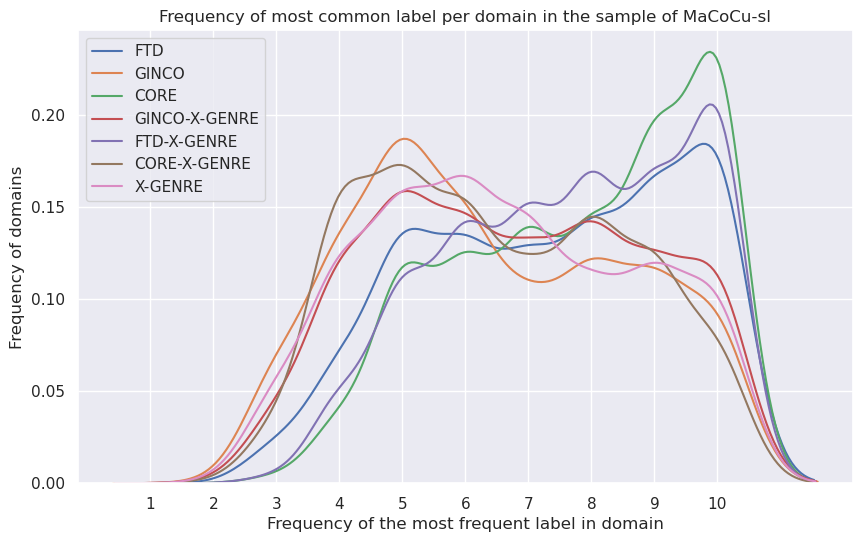

In [107]:
sns.set(rc={"figure.figsize": (10, 6)})
for classifier in classifiers:
	ax = sns.kdeplot(label_frequency_dict[classifier], x = range(10), label = f"{classifier}", bw_method = 0.25)

plt.gca().set(title='Frequency of most common label per domain in the sample of MaCoCu-sl', ylabel='Frequency of domains', xlabel="Frequency of the most frequent label in domain")
ax.set_xticks([1,2,3,4,5,6,7,8,9,10])

plt.legend();


# Save the plot
fig1 = plt.gcf()
plt.show()
fig1.savefig("figures/Comparison-of-distribution-in-domains-MaCoCu-sl-KDE.png",dpi=100)

#### Histogram with multiple bins

In [129]:
# Create a dataframe with counts of 1-10 occurences of labels in domains as rows and each classifier as columns
genre_distribution["biggest-label-frequency-FTD"].value_counts().to_dict()

def create_histogram_df(genre_column):
	histogram_dict = genre_distribution[f"biggest-label-frequency-{genre_column}"].value_counts().to_dict()
	histogram_series = pd.Series(list(histogram_dict.values()), index = list(histogram_dict.keys()))

	histogram_df = pd.DataFrame({"Occurences of label in domain": histogram_series.index, f"number-of-domains-{genre_column}": list(histogram_series)})
	return histogram_df


# Create a first dataframe
histogram_df = create_histogram_df(classifiers[0])

# Create dataframes for all other labels and append them to the first dataframe
for i in classifiers[1:]:
	new_df = create_histogram_df(i)
	histogram_df = pd.merge(histogram_df, new_df, how= "left", on= "Occurences of label in domain", suffixes = ["", ""])

histogram_df



,Occurences of label in domain,number-of-domains-FTD,number-of-domains-GINCO,number-of-domains-CORE,number-of-domains-GINCO-X-GENRE,number-of-domains-FTD-X-GENRE,number-of-domains-CORE-X-GENRE,number-of-domains-X-GENRE
0,10,203,102,251,128,221,81,113
1,9,163,117,192,122,161,126,121
2,5,144,200,122,164,112,173,160
3,8,142,125,138,146,167,149,109
4,6,133,151,121,145,140,154,169
5,7,125,100,137,128,147,115,146
6,4,68,135,36,125,49,169,127
7,3,23,70,4,42,4,33,55


In [130]:
# Sort the histogram based on frequency
histogram_df = histogram_df.sort_values(by="Occurences of label in domain", ascending=True)

# Set frequency of labels in domains as the index
histogram_df.set_index("Occurences of label in domain", inplace=True)

# Rename the columns
histogram_df.columns = classifiers

histogram_df

,FTD,GINCO,CORE,GINCO-X-GENRE,FTD-X-GENRE,CORE-X-GENRE,X-GENRE
Occurences of label in domain,,,,,,,
3,23,70,4,42,4,33,55
4,68,135,36,125,49,169,127
5,144,200,122,164,112,173,160
6,133,151,121,145,140,154,169
7,125,100,137,128,147,115,146
8,142,125,138,146,167,149,109
9,163,117,192,122,161,126,121
10,203,102,251,128,221,81,113


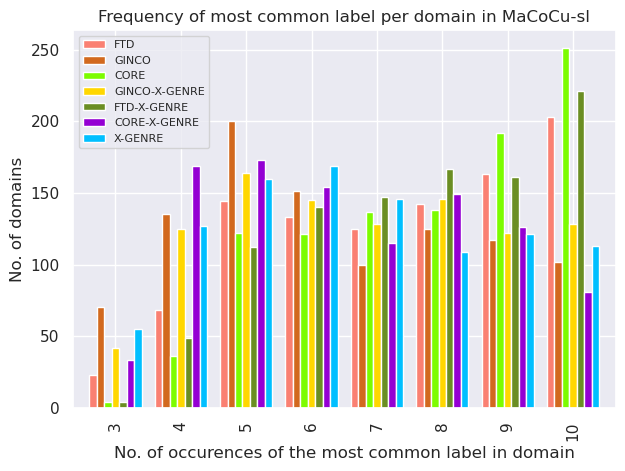

In [139]:
# Plot the histogram
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

histogram_df.plot(kind='bar', width=0.80, color = ["salmon", "chocolate", "lawngreen", "gold", "olivedrab", "darkviolet", "deepskyblue"])

plt.legend(loc=2,prop={'size':8})

plt.gca().set(title='Frequency of most common label per domain in MaCoCu-sl', ylabel='No. of domains', xlabel= 'No. of occurences of the most common label in domain')

# Save the plot
fig1 = plt.gcf()
plt.show()
fig1.savefig("figures/Comparison-of-distribution-in-domains-MaCoCu-sl-histogram.png",dpi=100)

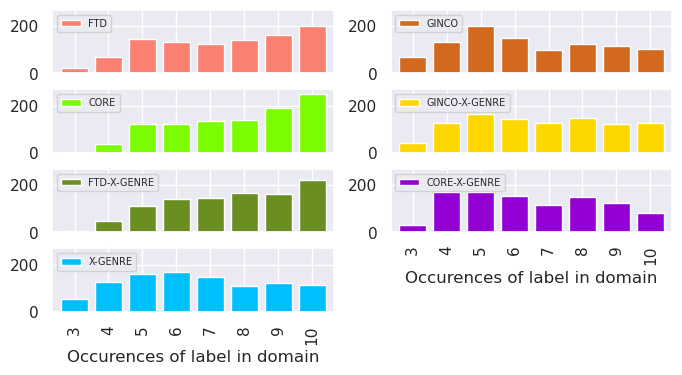

In [140]:
# Create separate histograms for each of the classifiers
# Define the main plot figure that will consists of multiple subplots
plt.figure(figsize= (8,4))

# Define the space between the subplots
plt.subplots_adjust(hspace=.25)

# First subplot
position = 0

colors =["salmon", "chocolate", "lawngreen", "gold", "olivedrab", "darkviolet", "deepskyblue"]

for i in range(7):
	position += 1
	plt.subplot(4,2,position)
	histogram_df[classifiers[i]].plot(kind='bar', width=0.80,ylim=[0,270], color=colors[i])
	plt.legend(loc=2,prop={'size':7})


# Save the plot
fig2 = plt.gcf()
plt.show()
fig2.savefig("figures/Comparison-of-distribution-in-domains-MaCoCu-sl-subplots.png",dpi=100)

In [114]:
list(range(7))

[0, 1, 2, 3, 4, 5, 6]

### Category report
We will look into how many times each specific category was most frequent on a domain.

In [17]:
# For this, I will use the domain-level corpus
genre_distribution.head(1)

,domain_id,genres-in-domain-FTD,genres-in-domain-GINCO,genres-in-domain-CORE,genres-in-domain-GINCO-X-GENRE,genres-in-domain-FTD-X-GENRE,genres-in-domain-CORE-X-GENRE,genres-in-domain-X-GENRE,biggest-label-frequency-FTD,biggest-label-frequency-GINCO,biggest-label-frequency-CORE,biggest-label-frequency-GINCO-X-GENRE,biggest-label-frequency-FTD-X-GENRE,biggest-label-frequency-CORE-X-GENRE,biggest-label-frequency-X-GENRE,most_frequent_label_FTD,tie-FTD,most_frequent_label_GINCO,tie-GINCO,most_frequent_label_CORE,tie-CORE,most_frequent_label_GINCO-X-GENRE,tie-GINCO-X-GENRE,most_frequent_label_FTD-X-GENRE,tie-FTD-X-GENRE,most_frequent_label_CORE-X-GENRE,tie-CORE-X-GENRE,most_frequent_label_X-GENRE,tie-X-GENRE
0,1a-pohistvo.si,{'A12 (promotion)': 10},"{'Promotion': 6, 'Instruction': 1, 'Informatio...","{'Informational Persuasion': 3, 'Informational...","{'Promotion': 5, 'Instruction': 1, 'Informatio...",{'Promotion': 10},"{'Opinion/Argumentation': 1, 'Instruction': 4,...","{'Promotion': 5, 'Legal': 1, 'Information/Expl...",10,6,7,5,10,5,5,A12 (promotion),no,Promotion,no,Informational Description/Explanation,no,Promotion,no,Promotion,no,Information/Explanation,no,Promotion,no


I will group the texts into domains and calculate for each label in each schema in how many domains it is the most frequent.

In [18]:
genre_distribution.columns

Index(['domain_id', 'genres-in-domain-FTD', 'genres-in-domain-GINCO',
       'genres-in-domain-CORE', 'genres-in-domain-GINCO-X-GENRE',
       'genres-in-domain-FTD-X-GENRE', 'genres-in-domain-CORE-X-GENRE',
       'genres-in-domain-X-GENRE', 'biggest-label-frequency-FTD',
       'biggest-label-frequency-GINCO', 'biggest-label-frequency-CORE',
       'biggest-label-frequency-GINCO-X-GENRE',
       'biggest-label-frequency-FTD-X-GENRE',
       'biggest-label-frequency-CORE-X-GENRE',
       'biggest-label-frequency-X-GENRE', 'most_frequent_label_FTD', 'tie-FTD',
       'most_frequent_label_GINCO', 'tie-GINCO', 'most_frequent_label_CORE',
       'tie-CORE', 'most_frequent_label_GINCO-X-GENRE', 'tie-GINCO-X-GENRE',
       'most_frequent_label_FTD-X-GENRE', 'tie-FTD-X-GENRE',
       'most_frequent_label_CORE-X-GENRE', 'tie-CORE-X-GENRE',
       'most_frequent_label_X-GENRE', 'tie-X-GENRE'],
      dtype='object')

In [20]:
genre_distribution['most_frequent_label_FTD'].value_counts(normalize=True)

A12 (promotion)       0.735265
A16 (information)     0.078921
A17 (review)          0.039960
A1 (argumentative)    0.039960
A8 (news)             0.033966
A7 (instruction)      0.028971
A11 (personal)        0.026973
A9 (legal)            0.008991
A4 (fiction)          0.005994
A14 (academic)        0.000999
Name: most_frequent_label_FTD, dtype: float64

In [25]:
# Create a dataframe with label distribution per classifier

def label_in_domain_distribution(classifier, corpus):
	new_df = pd.DataFrame({f"most frequent label in domain: {classifier}": list(zip(list(corpus[f"most_frequent_label_{classifier}"].value_counts().to_dict().keys()), [round(x,2) for x in list(corpus[f"most_frequent_label_{classifier}"].value_counts(normalize=True).to_dict().values())]))})
	return new_df

# Print out for all classifiers
for i in classifiers:
	new_df = label_in_domain_distribution(i, genre_distribution)
	print(new_df.to_markdown(index=False))

| most frequent label in domain: FTD   |
|:-------------------------------------|
| ('A12 (promotion)', 0.74)            |
| ('A16 (information)', 0.08)          |
| ('A17 (review)', 0.04)               |
| ('A1 (argumentative)', 0.04)         |
| ('A8 (news)', 0.03)                  |
| ('A7 (instruction)', 0.03)           |
| ('A11 (personal)', 0.03)             |
| ('A9 (legal)', 0.01)                 |
| ('A4 (fiction)', 0.01)               |
| ('A14 (academic)', 0.0)              |
| most frequent label in domain: GINCO   |
|:---------------------------------------|
| ('Promotion', 0.52)                    |
| ('Information/Explanation', 0.13)      |
| ('News/Reporting', 0.12)               |
| ('Opinion/Argumentation', 0.11)        |
| ('List of Summaries/Excerpts', 0.04)   |
| ('Instruction', 0.04)                  |
| ('Forum', 0.01)                        |
| ('Legal/Regulation', 0.01)             |
| ('Other', 0.0)                         |
| most frequent label in domain: CO

### Calculating scores assuming domains are uni-genre
Calculating F1, precision, recall assuming that domains are uni-genre. To calculate this, I will take the predicted labels as y_pred and the most_frequent_label (most frequent label in domain) labels as y_true.

In [85]:
# Open the extended corpus
extended_corpus = corpus

In [86]:
# For this, I will use the extended corpus with information on the instance-level predicted genre and most frequent genre of the domain
extended_corpus.tail(1)

,domain,url,text,doc,length,FTD,FTD_label_distribution,FTD_confidence,GINCO,GINCO_label_distribution,GINCO_confidence,CORE,CORE_label_distribution,CORE_confidence,GINCO-X-GENRE,GINCO-X-GENRE_label_distribution,GINCO-X-GENRE_confidence,FTD-X-GENRE,FTD-X-GENRE_label_distribution,FTD-X-GENRE_confidence,CORE-X-GENRE,CORE-X-GENRE_label_distribution,CORE-X-GENRE_confidence,X-GENRE,X-GENRE_label_distribution,X-GENRE_confidence,domain_id,genres-in-domain-FTD,genres-in-domain-GINCO,genres-in-domain-CORE,genres-in-domain-GINCO-X-GENRE,genres-in-domain-FTD-X-GENRE,genres-in-domain-CORE-X-GENRE,genres-in-domain-X-GENRE,biggest-label-frequency-FTD,biggest-label-frequency-GINCO,biggest-label-frequency-CORE,biggest-label-frequency-GINCO-X-GENRE,biggest-label-frequency-FTD-X-GENRE,biggest-label-frequency-CORE-X-GENRE,biggest-label-frequency-X-GENRE,most_frequent_label_FTD,tie-FTD,most_frequent_label_GINCO,tie-GINCO,most_frequent_label_CORE,tie-CORE,most_frequent_label_GINCO-X-GENRE,tie-GINCO-X-GENRE,most_frequent_label_FTD-X-GENRE,tie-FTD-X-GENRE,most_frequent_label_CORE-X-GENRE,tie-CORE-X-GENRE,most_frequent_label_X-GENRE,tie-X-GENRE
10009,nkt-z.si,http://www.nkt-z.si/wps/portal/nktz/home/news_...,O tej spletni strani\nNovice\nZdruženo kraljes...,"<doc id=""macocu.si.5930244"" title=""NKT-Z | Sez...",112,A1 (argumentative),"{7: 0.0098, 8: 0.096, 0: 0.7659, 1: 0.0082, 6:...",0.765945,List of Summaries/Excerpts,"{'Forum': 0.0088, 'News/Reporting': 0.1203, 'O...",0.764321,Informational Description/Explanation,"{'Interactive Discussion': 0.0022, 'Narrative'...",0.86502,Other,"{'Information/Explanation': 0.0058, 'Opinion/A...",0.572598,News,"{'Promotion': 0.0763, 'Opinion/Argumentation':...",0.441906,Information/Explanation,"{'Other': 0.0299, 'Information/Explanation': 0...",0.568542,News,"{'Other': 0.0002, 'Information/Explanation': 0...",0.998475,nkt-z.si,"{'A16 (information)': 2, 'A9 (legal)': 6, 'A7 ...","{'Information/Explanation': 6, 'Legal/Regulati...",{'Informational Description/Explanation': 10},"{'Information/Explanation': 5, 'Other': 2, 'Le...","{'Information/Explanation': 2, 'Legal': 7, 'Ne...",{'Information/Explanation': 10},"{'Information/Explanation': 3, 'Legal': 3, 'In...",6,6,10,5,7,10,3,A9 (legal),no,Information/Explanation,no,Informational Description/Explanation,no,Information/Explanation,no,Legal,no,Information/Explanation,no,Information/Explanation,yes


In [87]:
# Let's look at what the information for one domain looks like
extended_corpus[extended_corpus["domain"] == "nkt-z.si"]

,domain,url,text,doc,length,FTD,FTD_label_distribution,FTD_confidence,GINCO,GINCO_label_distribution,GINCO_confidence,CORE,CORE_label_distribution,CORE_confidence,GINCO-X-GENRE,GINCO-X-GENRE_label_distribution,GINCO-X-GENRE_confidence,FTD-X-GENRE,FTD-X-GENRE_label_distribution,FTD-X-GENRE_confidence,CORE-X-GENRE,CORE-X-GENRE_label_distribution,CORE-X-GENRE_confidence,X-GENRE,X-GENRE_label_distribution,X-GENRE_confidence,domain_id,genres-in-domain-FTD,genres-in-domain-GINCO,genres-in-domain-CORE,genres-in-domain-GINCO-X-GENRE,genres-in-domain-FTD-X-GENRE,genres-in-domain-CORE-X-GENRE,genres-in-domain-X-GENRE,biggest-label-frequency-FTD,biggest-label-frequency-GINCO,biggest-label-frequency-CORE,biggest-label-frequency-GINCO-X-GENRE,biggest-label-frequency-FTD-X-GENRE,biggest-label-frequency-CORE-X-GENRE,biggest-label-frequency-X-GENRE,most_frequent_label_FTD,tie-FTD,most_frequent_label_GINCO,tie-GINCO,most_frequent_label_CORE,tie-CORE,most_frequent_label_GINCO-X-GENRE,tie-GINCO-X-GENRE,most_frequent_label_FTD-X-GENRE,tie-FTD-X-GENRE,most_frequent_label_CORE-X-GENRE,tie-CORE-X-GENRE,most_frequent_label_X-GENRE,tie-X-GENRE
10000,nkt-z.si,http://www.nkt-z.si/wps/portal/nktz/home/healt...,O tej spletni strani\nLeta 2010 je Ministrstvo...,"<doc id=""macocu.si.5924495"" title=""NKT-Z | Dok...",530,A16 (information),"{7: 0.055, 8: 0.0715, 0: 0.074, 1: 0.0213, 6: ...",0.486800,Information/Explanation,"{'Forum': 0.0158, 'News/Reporting': 0.05, 'Opi...",0.764018,Informational Description/Explanation,"{'Interactive Discussion': 0.001, 'Narrative':...",0.981422,Information/Explanation,"{'Information/Explanation': 0.992, 'Opinion/Ar...",0.992025,Information/Explanation,"{'Promotion': 0.0338, 'Opinion/Argumentation':...",0.877353,Information/Explanation,"{'Other': 0.0084, 'Information/Explanation': 0...",0.921544,Information/Explanation,"{'Other': 0.0001, 'Information/Explanation': 0...",0.999088,nkt-z.si,"{'A16 (information)': 2, 'A9 (legal)': 6, 'A7 ...","{'Information/Explanation': 6, 'Legal/Regulati...",{'Informational Description/Explanation': 10},"{'Information/Explanation': 5, 'Other': 2, 'Le...","{'Information/Explanation': 2, 'Legal': 7, 'Ne...",{'Information/Explanation': 10},"{'Information/Explanation': 3, 'Legal': 3, 'In...",6,6,10,5,7,10,3,A9 (legal),no,Information/Explanation,no,Informational Description/Explanation,no,Information/Explanation,no,Legal,no,Information/Explanation,no,Information/Explanation,yes
10001,nkt-z.si,http://www.nkt-z.si/wps/portal/nktz/home/healt...,O tej spletni strani\nKaj se ne povrne\nZavod ...,"<doc id=""macocu.si.5926032"" title=""NKT-Z | Kaj...",87,A9 (legal),"{7: 0.0829, 8: 0.063, 0: 0.0494, 1: 0.0243, 6:...",0.521997,Information/Explanation,"{'Forum': 0.0168, 'News/Reporting': 0.0123, 'O...",0.819931,Informational Description/Explanation,"{'Interactive Discussion': 0.0034, 'Narrative'...",0.961063,Information/Explanation,"{'Information/Explanation': 0.9674, 'Opinion/A...",0.967439,Legal,"{'Promotion': 0.038, 'Opinion/Argumentation': ...",0.759083,Information/Explanation,"{'Other': 0.0599, 'Information/Explanation': 0...",0.217738,Legal,"{'Other': 0.0006, 'Information/Explanation': 0...",0.996252,nkt-z.si,"{'A16 (information)': 2, 'A9 (legal)': 6, 'A7 ...","{'Information/Explanation': 6, 'Legal/Regulati...",{'Informational Description/Explanation': 10},"{'Information/Explanation': 5, 'Other': 2, 'Le...","{'Information/Explanation': 2, 'Legal': 7, 'Ne...",{'Information/Explanation': 10},"{'Information/Explanation': 3, 'Legal': 3, 'In...",6,6,10,5,7,10,3,A9 (legal),no,Information/Explanation,no,Informational Description/Explanation,no,Information/Explanation,no,Legal,no,Information/Explanation,no,Information/Explanation,yes
10002,nkt-z.si,http://www.nkt-z.si/wps/portal/nktz/home/healt...,O tej spletni strani\nDomov &gt; Zdravstveni s...,"<doc id=""macocu.si.5926372"" title=""NKT-Z | Nad...",155,A16 (information),"{7: 0.0896, 8: 0.0366, 0: 0.0324, 1: 0.0155, 6...",0.562893,Information/Explanation,"{'F

In [88]:
extended_corpus.columns

Index(['domain', 'url', 'text', 'doc', 'length', 'FTD',
       'FTD_label_distribution', 'FTD_confidence', 'GINCO',
       'GINCO_label_distribution', 'GINCO_confidence', 'CORE',
       'CORE_label_distribution', 'CORE_confidence', 'GINCO-X-GENRE',
       'GINCO-X-GENRE_label_distribution', 'GINCO-X-GENRE_confidence',
       'FTD-X-GENRE', 'FTD-X-GENRE_label_distribution',
       'FTD-X-GENRE_confidence', 'CORE-X-GENRE',
       'CORE-X-GENRE_label_distribution', 'CORE-X-GENRE_confidence', 'X-GENRE',
       'X-GENRE_label_distribution', 'X-GENRE_confidence', 'domain_id',
       'genres-in-domain-FTD', 'genres-in-domain-GINCO',
       'genres-in-domain-CORE', 'genres-in-domain-GINCO-X-GENRE',
       'genres-in-domain-FTD-X-GENRE', 'genres-in-domain-CORE-X-GENRE',
       'genres-in-domain-X-GENRE', 'biggest-label-frequency-FTD',
       'biggest-label-frequency-GINCO', 'biggest-label-frequency-CORE',
       'biggest-label-frequency-GINCO-X-GENRE',
       'biggest-label-frequency-FTD-X-GENR

In [89]:
# Code for getting micro, macro F1 scores, the classification report and the confusion matrix based on the predicted labels and the most frequent labels per domain (using domain information as a weak signal, under a hypothesis that texts from the same domain are usually in the same genre)

def scores_based_on_domain_signal(classifier):
	print(f"Classifier: {classifier}")

	y_pred = extended_corpus[f"{classifier}"].to_list()
	y_true = extended_corpus[f"most_frequent_label_{classifier}"].to_list()

	LABELS = list(extended_corpus[f"{classifier}"].unique())

	# Calculate the scores
	macro = f1_score(y_true, y_pred, labels=LABELS, average="macro")
	micro = f1_score(y_true, y_pred, labels=LABELS,  average="micro")
	print(f"Macro F1: {macro:0.3}, Micro F1: {micro:0.3}")

	# Print classification report
	print(classification_report(y_true, y_pred, labels = LABELS))
	classification_report_dict = classification_report(y_true, y_pred, labels = LABELS, output_dict=True)

	results = {"classifier":f"{classifier}", "Macro F1": round(macro,2), "Micro F1": round(micro,2), "Macro precision": round(classification_report_dict['macro avg']['precision'],2), "Macro recall": round(classification_report_dict["macro avg"]["recall"],2)}

	# Plot the confusion matrix:
	cm = confusion_matrix(y_true, y_pred, labels=LABELS)
	plt.figure(figsize=(9, 9))
	plt.imshow(cm, cmap="Oranges")
	for (i, j), z in np.ndenumerate(cm):
		plt.text(j, i, '{:d}'.format(z), ha='center', va='center')
	classNames = LABELS
	plt.ylabel('Predicted label')
	plt.xlabel('Most frequent label in domain')
	tick_marks = np.arange(len(classNames))
	plt.xticks(tick_marks, classNames, rotation=90)
	plt.yticks(tick_marks, classNames)
	plt.title(f"Comparison of predicted labels and labels that are most frequent per domain: {classifier}")

	plt.tight_layout()
	fig1 = plt.gcf()
	plt.show()
	plt.draw()
	#fig1.savefig("",dpi=100)

	return results

Classifier: FTD
Macro F1: 0.516, Micro F1: 0.736
                    precision    recall  f1-score   support

   A12 (promotion)       0.93      0.78      0.85      7360
A1 (argumentative)       0.43      0.61      0.51       400
  A7 (instruction)       0.36      0.63      0.46       290
 A16 (information)       0.40      0.59      0.47       790
         A8 (news)       0.56      0.68      0.62       340
      A17 (review)       0.43      0.55      0.48       400
    A11 (personal)       0.50      0.59      0.54       270
        A9 (legal)       0.27      0.58      0.36        90
    A14 (academic)       0.15      0.60      0.24        10
      A4 (fiction)       0.62      0.63      0.63        60

          accuracy                           0.74     10010
         macro avg       0.46      0.62      0.52     10010
      weighted avg       0.80      0.74      0.76     10010



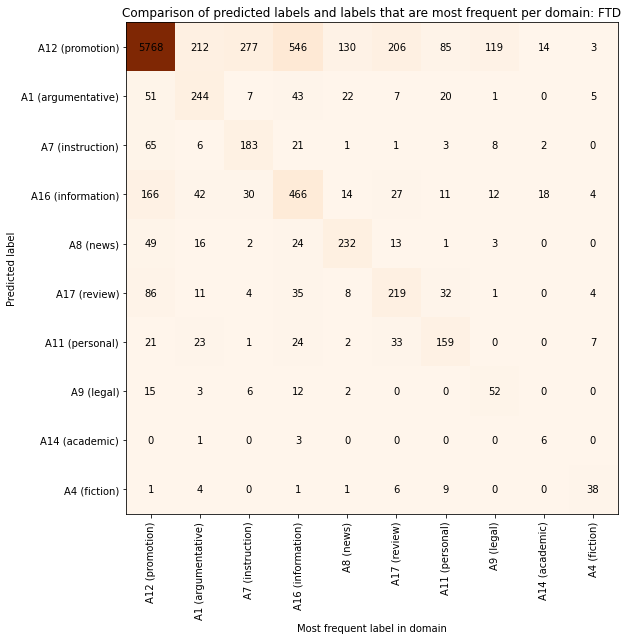

Classifier: GINCO
Macro F1: 0.486, Micro F1: 0.642
                            precision    recall  f1-score   support

                 Promotion       0.86      0.72      0.78      5190
List of Summaries/Excerpts       0.25      0.48      0.33       430
            News/Reporting       0.62      0.56      0.59      1250
                     Other       0.09      0.44      0.15        50
   Information/Explanation       0.53      0.56      0.55      1320
     Opinion/Argumentation       0.60      0.60      0.60      1130
               Instruction       0.34      0.57      0.43       430
          Legal/Regulation       0.26      0.38      0.31        60
                     Forum       0.65      0.63      0.64       150

                  accuracy                           0.64     10010
                 macro avg       0.47      0.55      0.49     10010
              weighted avg       0.70      0.64      0.66     10010



<Figure size 432x288 with 0 Axes>

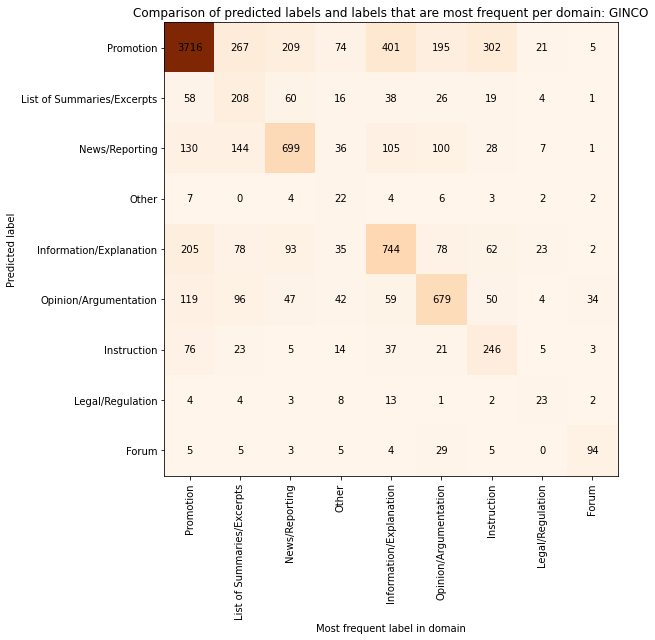

Classifier: CORE
Macro F1: 0.51, Micro F1: 0.779
                                       precision    recall  f1-score   support

Informational Description/Explanation       0.92      0.81      0.86      7620
             Informational Persuasion       0.51      0.69      0.59       910
                              Opinion       0.34      0.54      0.42       230
                            Narrative       0.63      0.71      0.67       850
                               Spoken       0.12      0.35      0.17        20
                 How-To/Instructional       0.36      0.64      0.46       290
               Interactive Discussion       0.35      0.63      0.45        70
                              Lyrical       0.35      0.65      0.46        20

                             accuracy                           0.78     10010
                            macro avg       0.45      0.63      0.51     10010
                         weighted avg       0.82      0.78      0.79     10010



<Figure size 432x288 with 0 Axes>

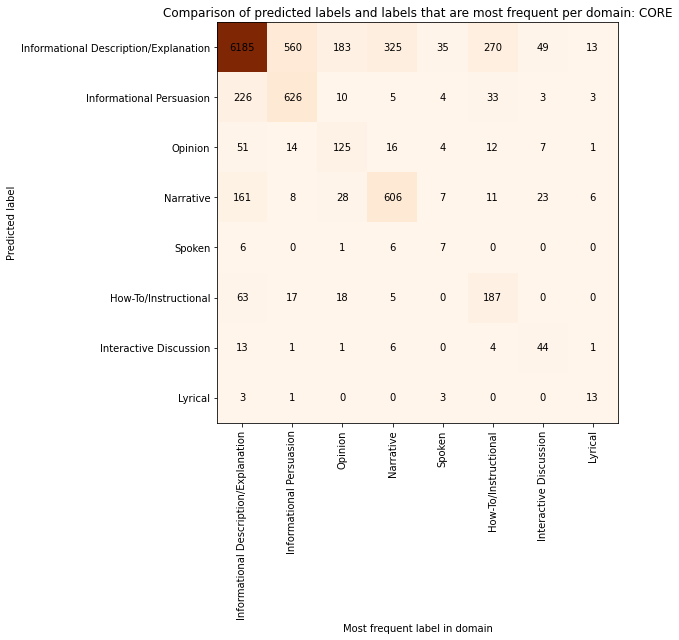

Classifier: GINCO-X-GENRE
Macro F1: 0.526, Micro F1: 0.675
                         precision    recall  f1-score   support

              Promotion       0.87      0.74      0.80      5690
                   News       0.67      0.63      0.65      1340
                  Other       0.26      0.48      0.34       330
Information/Explanation       0.46      0.58      0.51      1160
  Opinion/Argumentation       0.57      0.60      0.59       860
            Instruction       0.35      0.59      0.44       430
                  Legal       0.28      0.43      0.34        60
                  Forum       0.57      0.59      0.58       130
          Prose/Lyrical       0.40      0.60      0.48        10

               accuracy                           0.68     10010
              macro avg       0.49      0.58      0.53     10010
           weighted avg       0.72      0.68      0.69     10010



<Figure size 432x288 with 0 Axes>

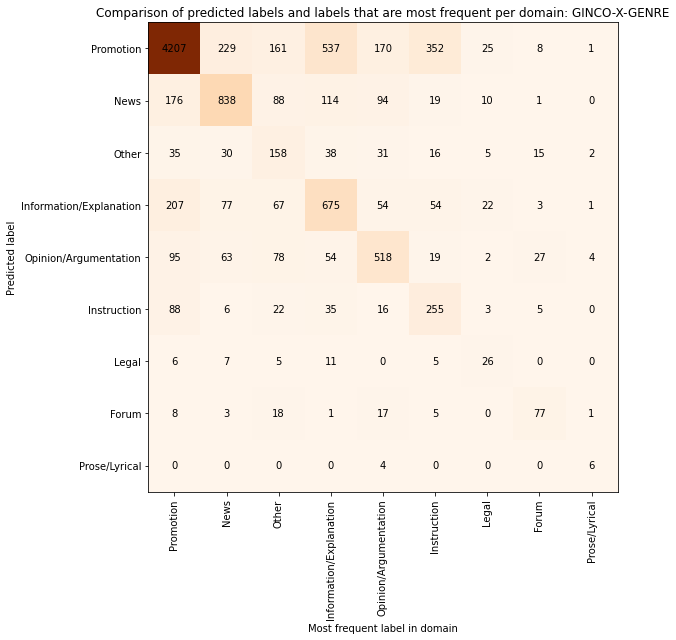

Classifier: FTD-X-GENRE
Macro F1: 0.571, Micro F1: 0.762
                         precision    recall  f1-score   support

              Promotion       0.92      0.80      0.86      7610
Information/Explanation       0.50      0.65      0.56      1220
                   News       0.51      0.68      0.59       480
  Opinion/Argumentation       0.52      0.73      0.61       220
            Instruction       0.31      0.64      0.42       280
                  Legal       0.29      0.62      0.40       130
          Prose/Lyrical       0.55      0.60      0.57        70

               accuracy                           0.76     10010
              macro avg       0.51      0.67      0.57     10010
           weighted avg       0.82      0.76      0.78     10010



<Figure size 432x288 with 0 Axes>

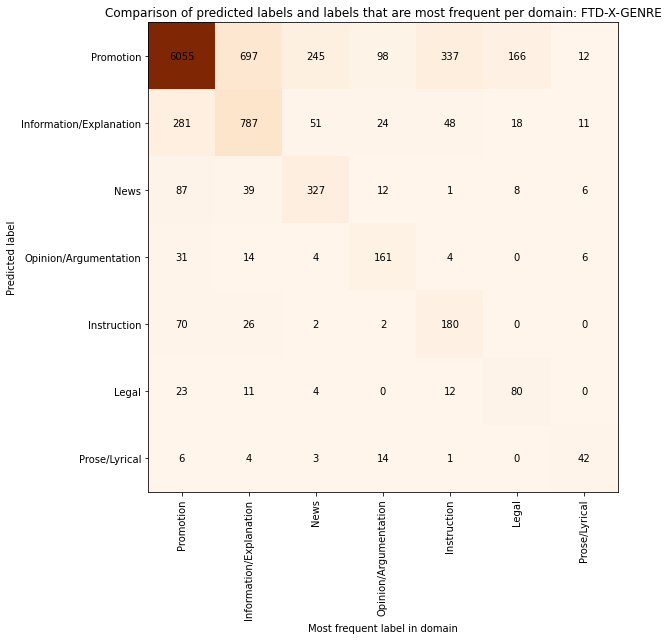

Classifier: CORE-X-GENRE
Macro F1: 0.53, Micro F1: 0.65
                         precision    recall  f1-score   support

Information/Explanation       0.81      0.70      0.75      5140
  Opinion/Argumentation       0.49      0.52      0.50      1310
            Instruction       0.60      0.64      0.62      1850
                   News       0.57      0.64      0.60      1110
                  Forum       0.39      0.61      0.48       350
          Prose/Lyrical       0.47      0.52      0.49       180
                  Other       0.18      0.53      0.27        70

               accuracy                           0.65     10010
              macro avg       0.50      0.59      0.53     10010
           weighted avg       0.68      0.65      0.66     10010



<Figure size 432x288 with 0 Axes>

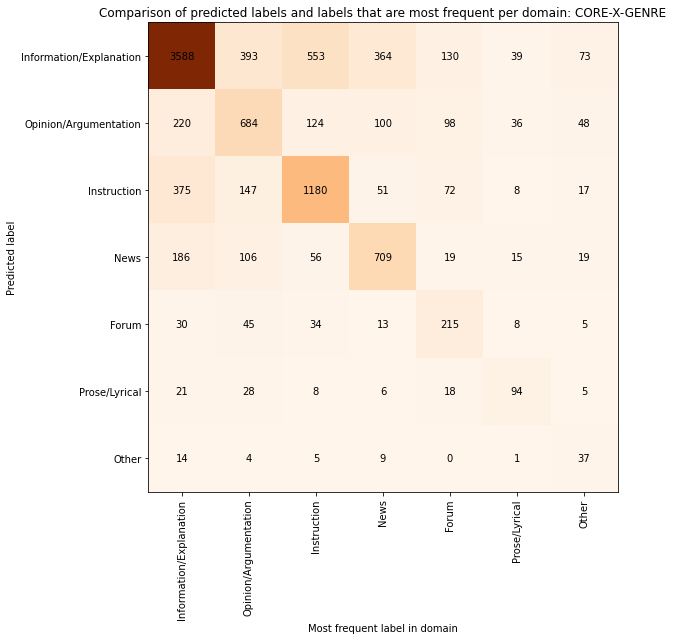

Classifier: X-GENRE
Macro F1: 0.514, Micro F1: 0.66
                         precision    recall  f1-score   support

              Promotion       0.84      0.73      0.78      4970
  Opinion/Argumentation       0.57      0.60      0.58      1080
                  Other       0.14      0.42      0.21       110
Information/Explanation       0.54      0.59      0.56      1640
                   News       0.67      0.63      0.65      1430
            Instruction       0.41      0.58      0.48       560
                  Legal       0.16      0.43      0.23        70
          Prose/Lyrical       0.52      0.60      0.56        40
                  Forum       0.56      0.58      0.57       110

               accuracy                           0.66     10010
              macro avg       0.49      0.57      0.51     10010
           weighted avg       0.70      0.66      0.67     10010



<Figure size 432x288 with 0 Axes>

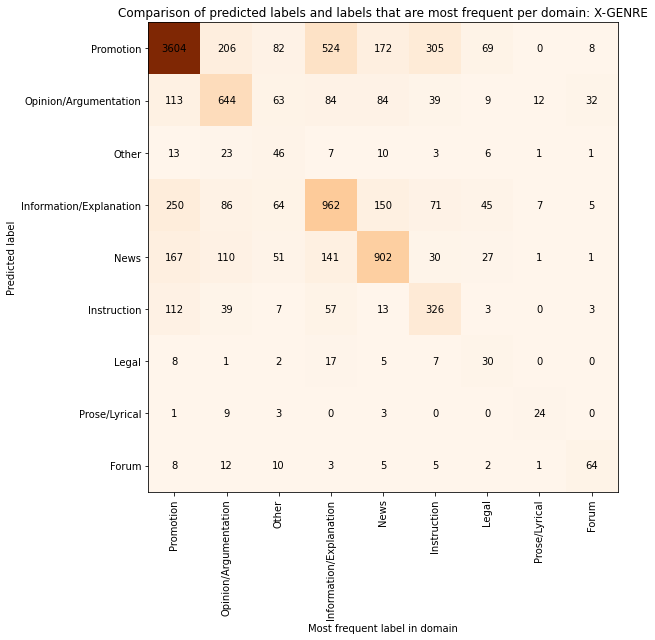

{'Classifier': ['FTD',
  'GINCO',
  'CORE',
  'GINCO-X-GENRE',
  'FTD-X-GENRE',
  'CORE-X-GENRE',
  'X-GENRE'],
 'Macro F1': [0.52, 0.49, 0.51, 0.53, 0.57, 0.53, 0.51],
 'Micro F1': [0.74, 0.64, 0.78, 0.68, 0.76, 0.65, 0.66],
 'Macro precision': [0.46, 0.47, 0.45, 0.49, 0.51, 0.5, 0.49],
 'Macro recall': [0.62, 0.55, 0.63, 0.58, 0.67, 0.59, 0.57]}

<Figure size 432x288 with 0 Axes>

In [90]:
results_dict= {'Classifier': [], 'Macro F1': [], 'Micro F1': [], 'Macro precision': [], 'Macro recall': []}

for classifier in classifiers:
	results_report = scores_based_on_domain_signal(classifier)
	results_dict['Classifier'].append(results_report["classifier"])
	results_dict['Macro F1'].append(results_report['Macro F1'])
	results_dict['Micro F1'].append(results_report['Micro F1'])
	results_dict['Macro precision'].append(results_report['Macro precision'])
	results_dict['Macro recall'].append(results_report['Macro recall'])

results_dict


In [91]:
# Create a dataframe with results
results_df = pd.DataFrame(results_dict)
results_df = results_df.sort_values("Macro F1", ascending=False)

print(results_df.to_markdown(index=False))

| Classifier    |   Macro F1 |   Micro F1 |   Macro precision |   Macro recall |
|:--------------|-----------:|-----------:|------------------:|---------------:|
| FTD-X-GENRE   |       0.57 |       0.76 |              0.51 |           0.67 |
| GINCO-X-GENRE |       0.53 |       0.68 |              0.49 |           0.58 |
| CORE-X-GENRE  |       0.53 |       0.65 |              0.5  |           0.59 |
| FTD           |       0.52 |       0.74 |              0.46 |           0.62 |
| CORE          |       0.51 |       0.78 |              0.45 |           0.63 |
| X-GENRE       |       0.51 |       0.66 |              0.49 |           0.57 |
| GINCO         |       0.49 |       0.64 |              0.47 |           0.55 |


Analyze which labels are mixed most often

In [102]:
extended_corpus.columns

Index(['domain', 'url', 'text', 'doc', 'length', 'FTD',
       'FTD_label_distribution', 'FTD_confidence', 'GINCO',
       'GINCO_label_distribution', 'GINCO_confidence', 'CORE',
       'CORE_label_distribution', 'CORE_confidence', 'GINCO-X-GENRE',
       'GINCO-X-GENRE_label_distribution', 'GINCO-X-GENRE_confidence',
       'FTD-X-GENRE', 'FTD-X-GENRE_label_distribution',
       'FTD-X-GENRE_confidence', 'CORE-X-GENRE',
       'CORE-X-GENRE_label_distribution', 'CORE-X-GENRE_confidence', 'X-GENRE',
       'X-GENRE_label_distribution', 'X-GENRE_confidence', 'domain_id',
       'genres-in-domain-FTD', 'genres-in-domain-GINCO',
       'genres-in-domain-CORE', 'genres-in-domain-GINCO-X-GENRE',
       'genres-in-domain-FTD-X-GENRE', 'genres-in-domain-CORE-X-GENRE',
       'genres-in-domain-X-GENRE', 'biggest-label-frequency-FTD',
       'biggest-label-frequency-GINCO', 'biggest-label-frequency-CORE',
       'biggest-label-frequency-GINCO-X-GENRE',
       'biggest-label-frequency-FTD-X-GENR

In [114]:
extended_corpus['weight_GINCO'] = extended_corpus.groupby(['GINCO', 'most_frequent_label_GINCO'])['GINCO'].transform('size')
extended_corpus.head(2)

,domain,url,text,doc,length,FTD,FTD_label_distribution,FTD_confidence,GINCO,GINCO_label_distribution,GINCO_confidence,CORE,CORE_label_distribution,CORE_confidence,GINCO-X-GENRE,GINCO-X-GENRE_label_distribution,GINCO-X-GENRE_confidence,FTD-X-GENRE,FTD-X-GENRE_label_distribution,FTD-X-GENRE_confidence,CORE-X-GENRE,CORE-X-GENRE_label_distribution,CORE-X-GENRE_confidence,X-GENRE,X-GENRE_label_distribution,X-GENRE_confidence,domain_id,genres-in-domain-FTD,genres-in-domain-GINCO,genres-in-domain-CORE,genres-in-domain-GINCO-X-GENRE,genres-in-domain-FTD-X-GENRE,genres-in-domain-CORE-X-GENRE,genres-in-domain-X-GENRE,biggest-label-frequency-FTD,biggest-label-frequency-GINCO,biggest-label-frequency-CORE,biggest-label-frequency-GINCO-X-GENRE,biggest-label-frequency-FTD-X-GENRE,biggest-label-frequency-CORE-X-GENRE,biggest-label-frequency-X-GENRE,most_frequent_label_FTD,tie-FTD,most_frequent_label_GINCO,tie-GINCO,most_frequent_label_CORE,tie-CORE,most_frequent_label_GINCO-X-GENRE,tie-GINCO-X-GENRE,most_frequent_label_FTD-X-GENRE,tie-FTD-X-GENRE,most_frequent_label_CORE-X-GENRE,tie-CORE-X-GENRE,most_frequent_label_X-GENRE,tie-X-GENRE,weight_GINCO
0,ahp.si,https://ahp.si/,Bolnica za živali Postojna\nBolnica za živali ...,"<doc id=""macocu.si.221"" title=""Domov | Bolnica...",841,A12 (promotion),"{7: 0.0115, 8: 0.009, 0: 0.0149, 1: 0.0047, 6:...",0.917997,Promotion,"{'Forum': 0.0017, 'News/Reporting': 0.0019, 'O...",0.954012,Informational Description/Explanation,"{'Interactive Discussion': 0.0013, 'Narrative'...",0.958831,Promotion,"{'Information/Explanation': 0.001, 'Opinion/Ar...",0.992724,Promotion,"{'Promotion': 0.9176, 'Opinion/Argumentation':...",0.917588,Information/Explanation,"{'Other': 0.0322, 'Information/Explanation': 0...",0.550356,Promotion,"{'Other': 0.0002, 'Information/Explanation': 0...",0.998997,ahp.si,{'A12 (promotion)': 10},"{'Promotion': 5, 'Information/Explanation': 5}",{'Informational Description/Explanation': 10},"{'Promotion': 7, 'Information/Explanation': 3}","{'Promotion': 8, 'Information/Explanation': 2}","{'Information/Explanation': 7, 'Opinion/Argume...","{'Promotion': 5, 'Information/Explanation': 5}",10,5,10,7,8,7,5,A12 (promotion),no,Information/Explanation,yes,Informational Description/Explanation,no,Promotion,no,Promotion,no,Information/Explanation,no,Promotion,yes,205
1,pas.si,https://www.pas.si/,Prezračevanje prostorov je nujno zaradi najman...,"<doc id=""macocu.si.390"" title=""Preverjeno - Ak...",124,A12 (promotion),"{7: 0.1273, 8: 0.0115, 0: 0.08, 1: 0.0467, 6: ...",0.446781,List of Summaries/Excerpts,"{'Forum': 0.0041, 'News/Reporting': 0.0195, 'O...",0.919409,Informational Description/Explanation,"{'Interactive Discussion': 0.0251, 'Narrative'...",0.650196,Promotion,"{'Information/Explanation': 0.0029, 'Opinion/A...",0.984429,Promotion,"{'Promotion': 0.4754, 'Opinion/Argumentation':...",0.475421,Opinion/Argumentation,"{'Other': 0.0831, 'Information/Explanation': 0...",0.521125,Opinion/Argumentation,"{'Other': 0.0005, 'Information/Explanation': 0...",0.963703,pas.si,"{'A12 (promotion)': 6, 'A7 (instruction)': 1, ...","{'List of Summaries/Excerpts': 1, 'Opinion/Arg...","{'Informational Description/Explanation': 5, '...","{'Promotion': 8, 'Instruction': 2}","{'Promotion': 6, 'Instruction': 1, 'Informatio...","{'Opinion/Argumentation': 2, 'Instruction': 4,...","{'Opinion/Argumentation': 3, 'Promotion': 3, '...",6,5,5,8,6,4,3,A12 (promotion),no,Promotion,no,Informational Description/Explanation,no,Promotion,no,Promotion,no,Instruction,no,Opinion/Argumentation,yes,267


In [121]:
extended_corpus['GINCO_label_frequency'] = extended_corpus.groupby(['most_frequent_label_GINCO'])['most_frequent_label_GINCO'].transform('size')
extended_corpus.head(2)

,domain,url,text,doc,length,FTD,FTD_label_distribution,FTD_confidence,GINCO,GINCO_label_distribution,GINCO_confidence,CORE,CORE_label_distribution,CORE_confidence,GINCO-X-GENRE,GINCO-X-GENRE_label_distribution,GINCO-X-GENRE_confidence,FTD-X-GENRE,FTD-X-GENRE_label_distribution,FTD-X-GENRE_confidence,CORE-X-GENRE,CORE-X-GENRE_label_distribution,CORE-X-GENRE_confidence,X-GENRE,X-GENRE_label_distribution,X-GENRE_confidence,domain_id,genres-in-domain-FTD,genres-in-domain-GINCO,genres-in-domain-CORE,genres-in-domain-GINCO-X-GENRE,genres-in-domain-FTD-X-GENRE,genres-in-domain-CORE-X-GENRE,genres-in-domain-X-GENRE,biggest-label-frequency-FTD,biggest-label-frequency-GINCO,biggest-label-frequency-CORE,biggest-label-frequency-GINCO-X-GENRE,biggest-label-frequency-FTD-X-GENRE,biggest-label-frequency-CORE-X-GENRE,biggest-label-frequency-X-GENRE,most_frequent_label_FTD,tie-FTD,most_frequent_label_GINCO,tie-GINCO,most_frequent_label_CORE,tie-CORE,most_frequent_label_GINCO-X-GENRE,tie-GINCO-X-GENRE,most_frequent_label_FTD-X-GENRE,tie-FTD-X-GENRE,most_frequent_label_CORE-X-GENRE,tie-CORE-X-GENRE,most_frequent_label_X-GENRE,tie-X-GENRE,weight_GINCO,GINCO_label_frequency,GINCO-normalized-weight
0,ahp.si,https://ahp.si/,Bolnica za živali Postojna\nBolnica za živali ...,"<doc id=""macocu.si.221"" title=""Domov | Bolnica...",841,A12 (promotion),"{7: 0.0115, 8: 0.009, 0: 0.0149, 1: 0.0047, 6:...",0.917997,Promotion,"{'Forum': 0.0017, 'News/Reporting': 0.0019, 'O...",0.954012,Informational Description/Explanation,"{'Interactive Discussion': 0.0013, 'Narrative'...",0.958831,Promotion,"{'Information/Explanation': 0.001, 'Opinion/Ar...",0.992724,Promotion,"{'Promotion': 0.9176, 'Opinion/Argumentation':...",0.917588,Information/Explanation,"{'Other': 0.0322, 'Information/Explanation': 0...",0.550356,Promotion,"{'Other': 0.0002, 'Information/Explanation': 0...",0.998997,ahp.si,{'A12 (promotion)': 10},"{'Promotion': 5, 'Information/Explanation': 5}",{'Informational Description/Explanation': 10},"{'Promotion': 7, 'Information/Explanation': 3}","{'Promotion': 8, 'Information/Explanation': 2}","{'Information/Explanation': 7, 'Opinion/Argume...","{'Promotion': 5, 'Information/Explanation': 5}",10,5,10,7,8,7,5,A12 (promotion),no,Information/Explanation,yes,Informational Description/Explanation,no,Promotion,no,Promotion,no,Information/Explanation,no,Promotion,yes,205,1320,4.745370
1,pas.si,https://www.pas.si/,Prezračevanje prostorov je nujno zaradi najman...,"<doc id=""macocu.si.390"" title=""Preverjeno - Ak...",124,A12 (promotion),"{7: 0.1273, 8: 0.0115, 0: 0.08, 1: 0.0467, 6: ...",0.446781,List of Summaries/Excerpts,"{'Forum': 0.0041, 'News/Reporting': 0.0195, 'O...",0.919409,Informational Description/Explanation,"{'Interactive Discussion': 0.0251, 'Narrative'...",0.650196,Promotion,"{'Information/Explanation': 0.0029, 'Opinion/A...",0.984429,Promotion,"{'Promotion': 0.4754, 'Opinion/Argumentation':...",0.475421,Opinion/Argumentation,"{'Other': 0.0831, 'Information/Explanation': 0...",0.521125,Opinion/Argumentation,"{'Other': 0.0005, 'Information/Explanation': 0...",0.963703,pas.si,"{'A12 (promotion)': 6, 'A7 (instruction)': 1, ...","{'List of Summaries/Excerpts': 1, 'Opinion/Arg...","{'Informational Description/Explanation': 5, '...","{'Promotion': 8, 'Instruction': 2}","{'Promotion': 6, 'Instruction': 1, 'Informatio...","{'Opinion/Argumentation': 2, 'Instruction': 4,...","{'Opinion/Argumentation': 3, 'Promotion': 3, '...",6,5,5,8,6,4,3,A12 (promotion),no,Promotion,no,Informational Description/Explanation,no,Promotion,no,Promotion,no,Instruction,no,Opinion/Argumentation,yes,267,5190,32.363636


In [122]:
# Calculate normalized weight
extended_corpus["GINCO-normalized-weight"] = extended_corpus["weight_GINCO"]/extended_corpus["GINCO_label_frequency"]*100

extended_corpus.head(2)

,domain,url,text,doc,length,FTD,FTD_label_distribution,FTD_confidence,GINCO,GINCO_label_distribution,GINCO_confidence,CORE,CORE_label_distribution,CORE_confidence,GINCO-X-GENRE,GINCO-X-GENRE_label_distribution,GINCO-X-GENRE_confidence,FTD-X-GENRE,FTD-X-GENRE_label_distribution,FTD-X-GENRE_confidence,CORE-X-GENRE,CORE-X-GENRE_label_distribution,CORE-X-GENRE_confidence,X-GENRE,X-GENRE_label_distribution,X-GENRE_confidence,domain_id,genres-in-domain-FTD,genres-in-domain-GINCO,genres-in-domain-CORE,genres-in-domain-GINCO-X-GENRE,genres-in-domain-FTD-X-GENRE,genres-in-domain-CORE-X-GENRE,genres-in-domain-X-GENRE,biggest-label-frequency-FTD,biggest-label-frequency-GINCO,biggest-label-frequency-CORE,biggest-label-frequency-GINCO-X-GENRE,biggest-label-frequency-FTD-X-GENRE,biggest-label-frequency-CORE-X-GENRE,biggest-label-frequency-X-GENRE,most_frequent_label_FTD,tie-FTD,most_frequent_label_GINCO,tie-GINCO,most_frequent_label_CORE,tie-CORE,most_frequent_label_GINCO-X-GENRE,tie-GINCO-X-GENRE,most_frequent_label_FTD-X-GENRE,tie-FTD-X-GENRE,most_frequent_label_CORE-X-GENRE,tie-CORE-X-GENRE,most_frequent_label_X-GENRE,tie-X-GENRE,weight_GINCO,GINCO_label_frequency,GINCO-normalized-weight
0,ahp.si,https://ahp.si/,Bolnica za živali Postojna\nBolnica za živali ...,"<doc id=""macocu.si.221"" title=""Domov | Bolnica...",841,A12 (promotion),"{7: 0.0115, 8: 0.009, 0: 0.0149, 1: 0.0047, 6:...",0.917997,Promotion,"{'Forum': 0.0017, 'News/Reporting': 0.0019, 'O...",0.954012,Informational Description/Explanation,"{'Interactive Discussion': 0.0013, 'Narrative'...",0.958831,Promotion,"{'Information/Explanation': 0.001, 'Opinion/Ar...",0.992724,Promotion,"{'Promotion': 0.9176, 'Opinion/Argumentation':...",0.917588,Information/Explanation,"{'Other': 0.0322, 'Information/Explanation': 0...",0.550356,Promotion,"{'Other': 0.0002, 'Information/Explanation': 0...",0.998997,ahp.si,{'A12 (promotion)': 10},"{'Promotion': 5, 'Information/Explanation': 5}",{'Informational Description/Explanation': 10},"{'Promotion': 7, 'Information/Explanation': 3}","{'Promotion': 8, 'Information/Explanation': 2}","{'Information/Explanation': 7, 'Opinion/Argume...","{'Promotion': 5, 'Information/Explanation': 5}",10,5,10,7,8,7,5,A12 (promotion),no,Information/Explanation,yes,Informational Description/Explanation,no,Promotion,no,Promotion,no,Information/Explanation,no,Promotion,yes,205,1320,15.530303
1,pas.si,https://www.pas.si/,Prezračevanje prostorov je nujno zaradi najman...,"<doc id=""macocu.si.390"" title=""Preverjeno - Ak...",124,A12 (promotion),"{7: 0.1273, 8: 0.0115, 0: 0.08, 1: 0.0467, 6: ...",0.446781,List of Summaries/Excerpts,"{'Forum': 0.0041, 'News/Reporting': 0.0195, 'O...",0.919409,Informational Description/Explanation,"{'Interactive Discussion': 0.0251, 'Narrative'...",0.650196,Promotion,"{'Information/Explanation': 0.0029, 'Opinion/A...",0.984429,Promotion,"{'Promotion': 0.4754, 'Opinion/Argumentation':...",0.475421,Opinion/Argumentation,"{'Other': 0.0831, 'Information/Explanation': 0...",0.521125,Opinion/Argumentation,"{'Other': 0.0005, 'Information/Explanation': 0...",0.963703,pas.si,"{'A12 (promotion)': 6, 'A7 (instruction)': 1, ...","{'List of Summaries/Excerpts': 1, 'Opinion/Arg...","{'Informational Description/Explanation': 5, '...","{'Promotion': 8, 'Instruction': 2}","{'Promotion': 6, 'Instruction': 1, 'Informatio...","{'Opinion/Argumentation': 2, 'Instruction': 4,...","{'Opinion/Argumentation': 3, 'Promotion': 3, '...",6,5,5,8,6,4,3,A12 (promotion),no,Promotion,no,Informational Description/Explanation,no,Promotion,no,Promotion,no,Instruction,no,Opinion/Argumentation,yes,267,5190,5.144509


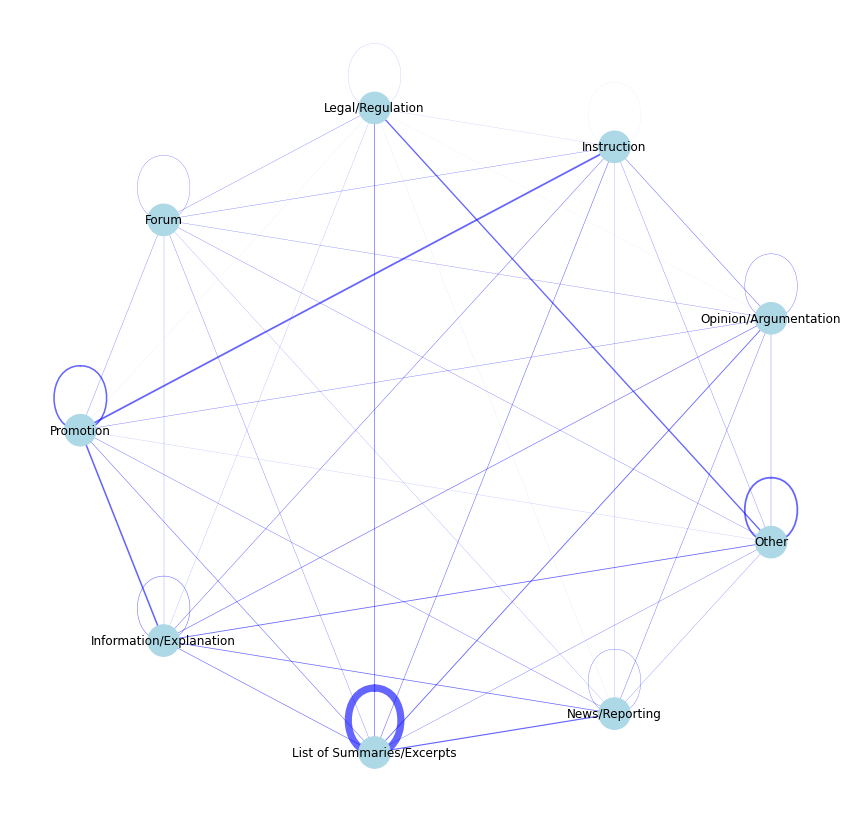

In [123]:
import networkx as nx

# Add information on the number of coocurrences of two labels
#extended_corpus['weight_GINCO'] = extended_corpus.groupby(['GINCO', 'most_frequent_label_GINCO'])['GINCO'].transform('size')

# Load df as a networkx graph
label_network = nx.from_pandas_edgelist(extended_corpus, source="GINCO", target="most_frequent_label_GINCO", edge_attr="GINCO-normalized-weight")

# Get edge weights so that edges with a higher weight will have a bigger width
widths = nx.get_edge_attributes(label_network, 'GINCO-normalized-weight')

# Get a list of nodes
nodelist =label_network.nodes()

# Create a dictionary of nodes so that nodes that appear more often will have a bigger size
d = dict(label_network.degree)

plt.figure(figsize=(15,15))

pos = nx.shell_layout(label_network)
# If you want to choose attributes of nodes, edges and labels, draw them separately:
nx.draw_networkx_nodes(label_network,pos,
                       nodelist=nodelist,
                       #node_size =1000,
                       node_color = "lightblue",
                       node_size=[v * 100 for v in d.values()]
                       )
nx.draw_networkx_edges(label_network,pos,
                       edgelist = widths.keys(),
                       width=[x/10 for x in list(widths.values())],
                       edge_color="blue", 
                       alpha=0.6
                       )
nx.draw_networkx_labels(label_network, pos=pos,
                        labels=dict(zip(nodelist,nodelist)),
                        font_size = 12,
                        )
plt.box(False)
plt.show()

### Comparison of X-GENRE predictions based on the majority prediction
Focus only on X-genre and assume the domain label to be the one that has been chosen most by ALL classifiers, calculate F1, (microF1, macroF1)

### Agreement between X-GENRE classifiers
For X-genre classifiers, calculate agreement between them via F1, macroF1, microF1 (one classifier y_pred, another y_true - confusion matrix).